In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import SpectralClustering
from sklearn.cluster import Birch
import numpy as np
import pandas as pd
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.stats import spearmanr, kruskal



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



In [ ]:
!pip install shap
!pip install lime
from lime import lime_tabular

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=8199c332fad793974ba4ec05f07fba7b393fda10432adf156c9d31856b313189
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


In [ ]:
!pip install ydata-profiling


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.4/400.4 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 1.8 MB/s eta 0:00:00


In [ ]:
# 1. LOAD & INITIAL CLEANING (EDA-BASED FIX)
print("STAGE 1: DATA LOADING & INITIAL CLEANING (EDA-BASED)")


# Load data
df = pd.read_csv("Rakamin Bootcamp - Dataset - Talent Segmentation Dataset.csv")
print(f"\n Data loaded successfully")
print(f"  Shape: {df.shape}")

print(f"\nDataset Overview:")
print(f"  Rows: {df.shape[0]}")
print(f"  Columns: {df.shape[1]}")
print(f"\n  Columns: {list(df.columns)}")

# Check missing values (raw)
print(f"\n Missing Values (Before Cleaning):")
missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(2)
print(pd.DataFrame({
    'Missing': missing,
    'Percentage (%)': missing_pct
})[missing > 0])



STAGE 1: DATA LOADING & INITIAL CLEANING (EDA-BASED)

 Data loaded successfully
  Shape: (1000, 11)

Dataset Overview:
  Rows: 1000
  Columns: 11

  Columns: ['EmployeeID', 'Age', 'Department', 'Gender', 'Education', 'YearsAtCompany', 'PerformanceScore', 'MonthlyIncome', 'JobSatisfaction', 'TrainingHours', 'CompetencyScore']

 Missing Values (Before Cleaning):
                  Missing  Percentage (%)
EmployeeID             50             5.0
Age                    50             5.0
Department             50             5.0
Gender                 50             5.0
Education              50             5.0
YearsAtCompany         50             5.0
PerformanceScore       50             5.0
MonthlyIncome          50             5.0
JobSatisfaction        50             5.0
TrainingHours          50             5.0
CompetencyScore        50             5.0


EDA

In [ ]:

# EDA 2: NUMERICAL SUMMARY

print("\n" + "="*70)
print("EDA 2: NUMERICAL SUMMARY")
print("="*70)

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
display(df[numerical_cols].describe().T)



EDA 2: NUMERICAL SUMMARY


count          mean           std     min      25%      50%  \
EmployeeID        950.0    504.495789    288.837223     1.0   253.25    507.5   
Age               950.0     40.591579     13.484782    -2.0    30.00     41.0   
YearsAtCompany    950.0     12.194737      7.335909     0.0     6.00     12.0   
PerformanceScore  950.0      3.000000      1.086365     1.0     2.00      3.0   
MonthlyIncome     950.0  13685.104211  36400.068162 -1000.0  6189.25  11887.0   
JobSatisfaction   950.0      3.008421      1.103655     1.0     2.00      3.0   
TrainingHours     950.0     50.736842     45.809522   -50.0    24.00     48.0   
CompetencyScore   950.0      3.005263      1.124014    -1.0     2.00      3.0   

                       75%       max  
EmployeeID          753.75    1000.0  
Age                  50.00     200.0  
YearsAtCompany       19.00      24.0  
PerformanceScore      4.00       5.0  
MonthlyIncome     18022.75  999999.0  
JobSatisfaction       4.00       5.0  
TrainingHours        75.00    1000.0  
CompetencyScore       4.00      10.0

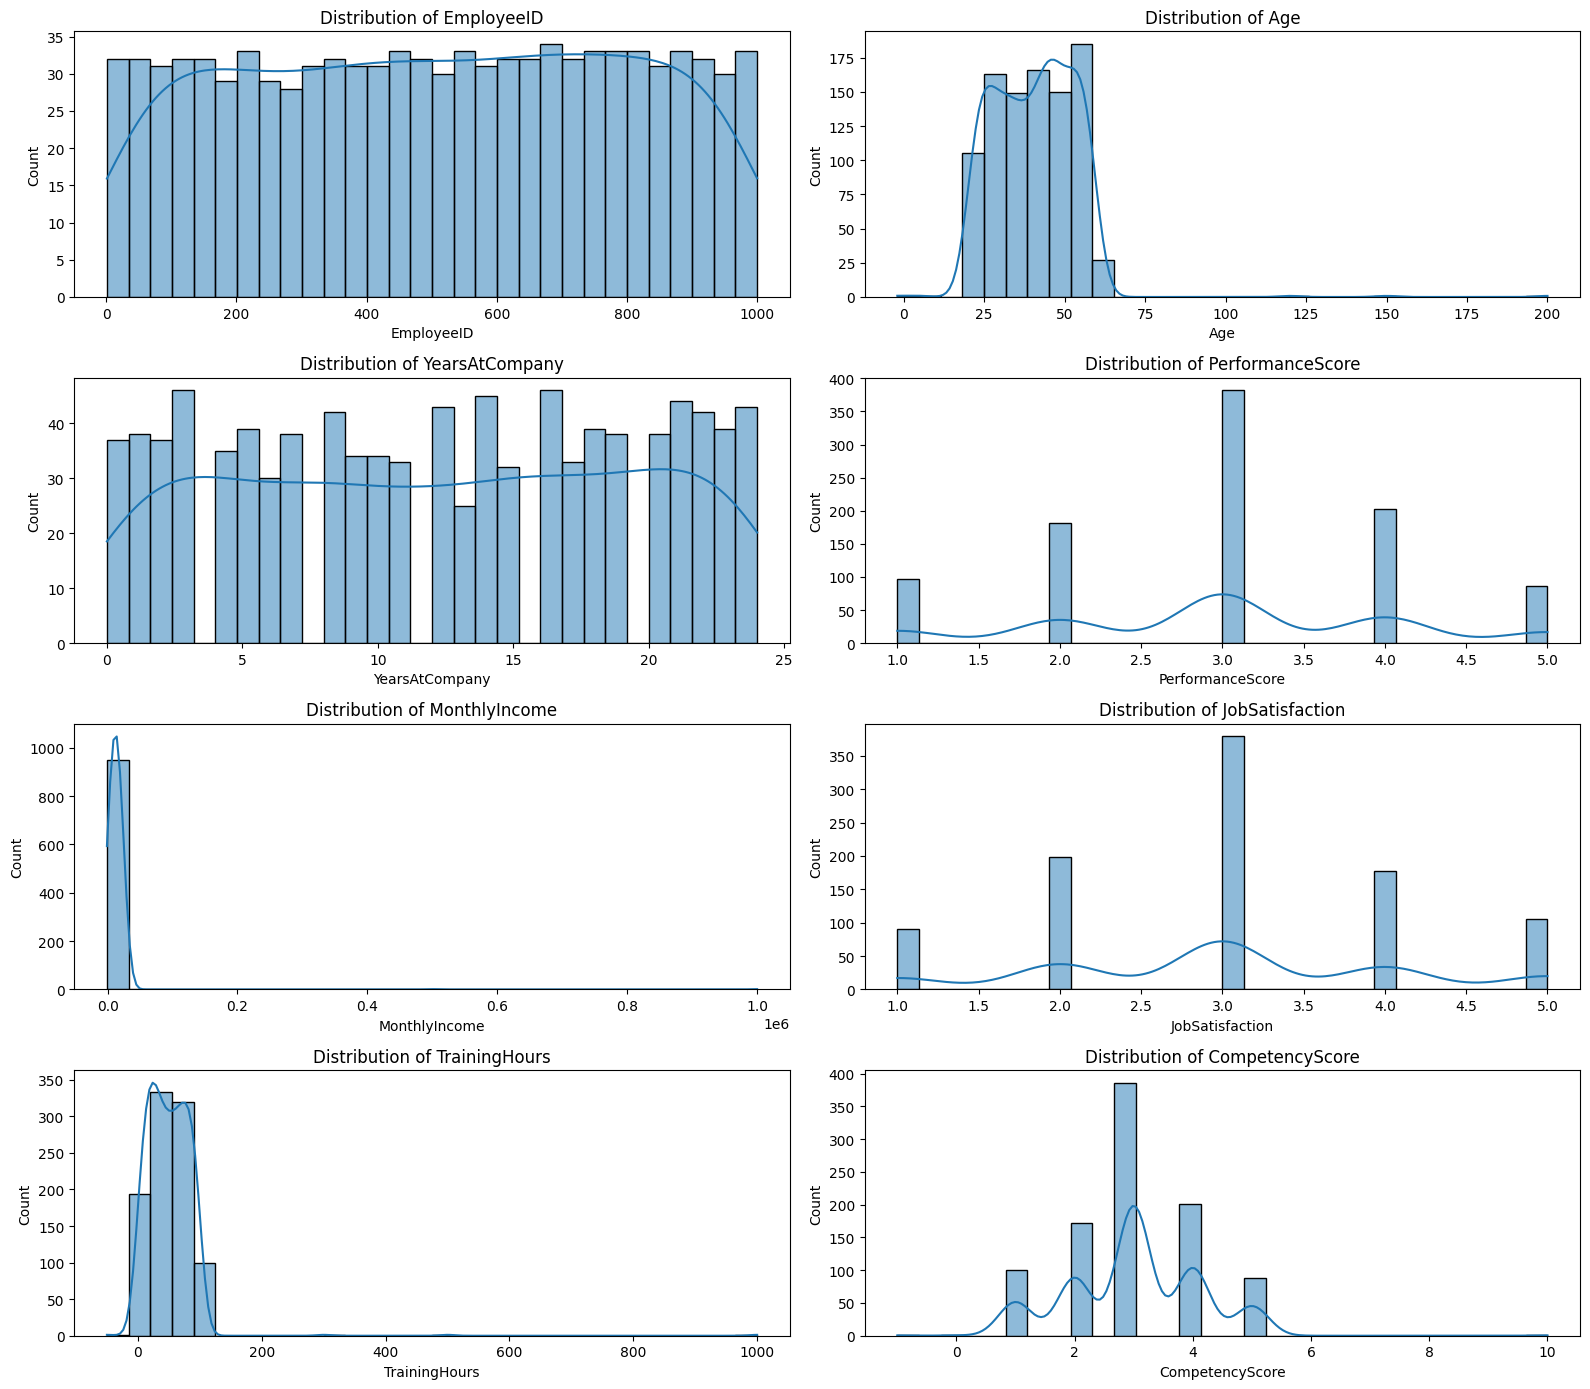

In [ ]:

# EDA 3: NUMERICAL DISTRIBUTION

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 14))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 2, i)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


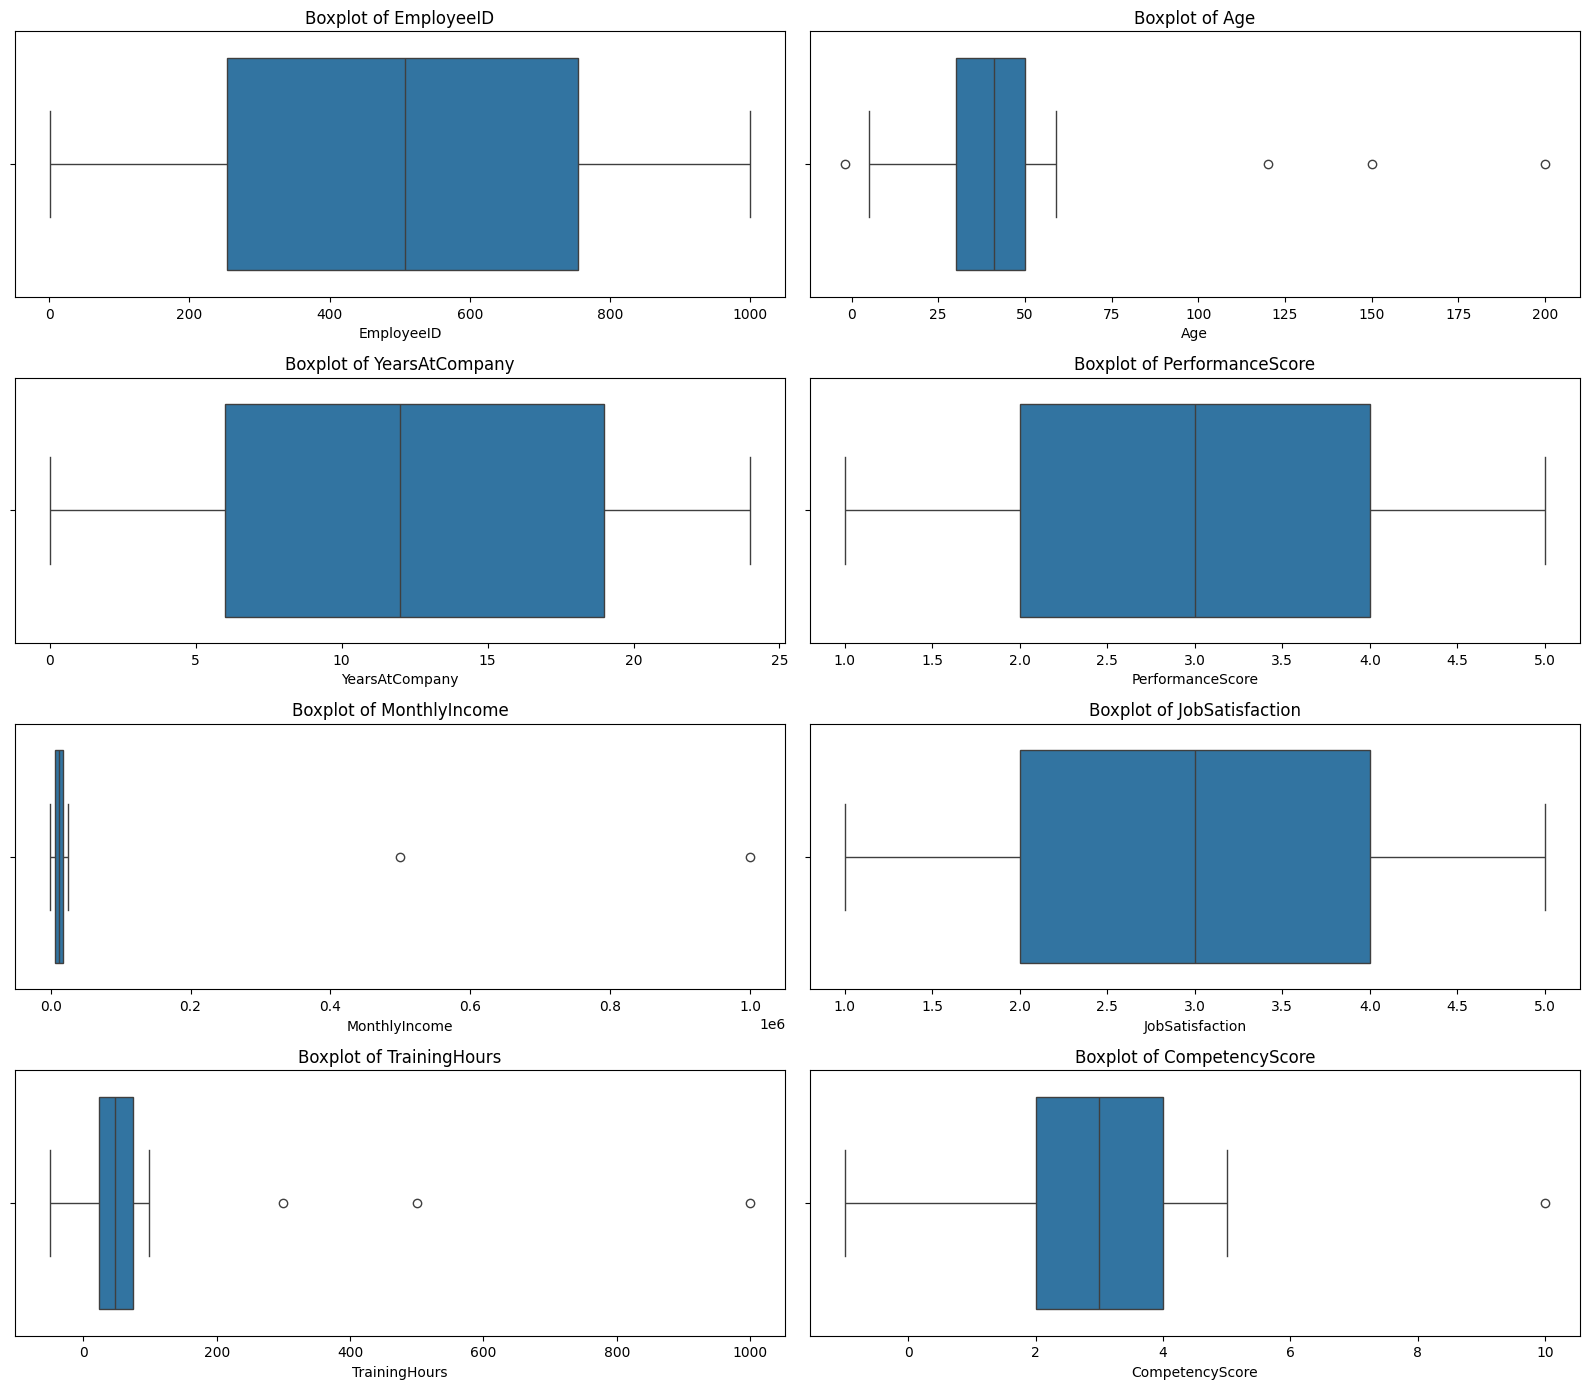

In [ ]:

# EDA 4: OUTLIER CHECK (BOXPLOT)

plt.figure(figsize=(16, 14))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()


In [ ]:
df_clean = df.copy()


In [ ]:
print("AGE SUMMARY")
print(df_clean['Age'].describe())

# Deteksi umur tidak logis
invalid_age_under = df_clean[df_clean['Age'] < 18]
invalid_age_over = df_clean[df_clean['Age'] > 65]

print(f"\nAge < 18: {len(invalid_age_under)} rows")
print(f"Age > 65: {len(invalid_age_over)} rows")


AGE SUMMARY
count    950.000000
mean      40.591579
std       13.484782
min       -2.000000
25%       30.000000
50%       41.000000
75%       50.000000
max      200.000000
Name: Age, dtype: float64

Age < 18: 2 rows
Age > 65: 3 rows


In [ ]:
# DELETE age < 18
df_clean = df_clean[df_clean['Age'] >= 18]

# Age > 65 → NaN (akan di-median)
df_clean.loc[df_clean['Age'] > 65, 'Age'] = np.nan


In [ ]:
print("\nMONTHLY INCOME SUMMARY")
print(df_clean['MonthlyIncome'].describe())

# Lihat kasus income ekstrem
extreme_income = df_clean[df_clean['MonthlyIncome'] > 100000]
extreme_income[['Age', 'YearsAtCompany', 'MonthlyIncome']].head()



MONTHLY INCOME SUMMARY
count       899.000000
mean      13759.630701
std       37380.508167
min       -1000.000000
25%        6249.000000
50%       11823.000000
75%       18007.500000
max      999999.000000
Name: MonthlyIncome, dtype: float64


Age  YearsAtCompany  MonthlyIncome
708  24.0            15.0       999999.0
835  58.0            10.0       500000.0

In [ ]:
# Ambil data Age < 18
underage_df = df[df['Age'] < 18].copy()

print(f"Jumlah data Age < 18: {len(underage_df)}")
underage_df.describe()


Jumlah data Age < 18: 2


EmployeeID       Age  YearsAtCompany  PerformanceScore  MonthlyIncome  \
count    2.000000  2.000000        2.000000               2.0       2.000000   
mean   483.000000  1.500000       17.000000               3.0   10909.500000   
std    429.920923  4.949747        9.899495               0.0   12667.817985   
min    179.000000 -2.000000       10.000000               3.0    1952.000000   
25%    331.000000 -0.250000       13.500000               3.0    6430.750000   
50%    483.000000  1.500000       17.000000               3.0   10909.500000   
75%    635.000000  3.250000       20.500000               3.0   15388.250000   
max    787.000000  5.000000       24.000000               3.0   19867.000000   

       JobSatisfaction  TrainingHours  CompetencyScore  
count         2.000000       2.000000          2.00000  
mean          4.000000      88.500000          2.50000  
std           1.414214       3.535534          2.12132  
min           3.000000      86.000000          1.00000  
25%           3.500000      87.250000          1.75000  
50%           4.000000      88.500000          2.50000  
75%           4.500000      89.750000          3.25000  
max           5.000000      91.000000          4.00000

### Ringkasan data:
- Jumlah observasi: 2 baris
- Rata-rata umur: 1,5 tahun
- Rentang umur: -2 sampai 5 tahun
- Rata-rata YearsAtCompany: 17 tahun
- Rentang YearsAtCompany: 10 – 24 tahun

In [ ]:
df_eda = df.copy()

df_eda['StartWorkingAge'] = df_eda['Age'] - df_eda['YearsAtCompany']

df_eda[['Age', 'YearsAtCompany', 'StartWorkingAge']].head()


Age  YearsAtCompany  StartWorkingAge
0  59.0            11.0             48.0
1  49.0            11.0             38.0
2  35.0            19.0             16.0
3  28.0             5.0             23.0
4  41.0            22.0             19.0

In [ ]:
print("StartWorkingAge Summary")
df_eda['StartWorkingAge'].describe()


StartWorkingAge Summary


count    902.000000
mean      28.233925
std       15.150215
min      -26.000000
25%       18.000000
50%       29.000000
75%       38.000000
max      196.000000
Name: StartWorkingAge, dtype: float64

In [ ]:
df_logic = df.copy()
df_logic['StartWorkingAge'] = df_logic['Age'] - df_logic['YearsAtCompany']

# DELETE: relasi tidak mungkin
delete_mask = (
    (df_logic['StartWorkingAge'] < 0) |
    (df_logic['StartWorkingAge'] > 65)
)
df_logic = df_logic[~delete_mask].copy()

# MEDIAN: age typo tapi masih mungkin
soft_age_mask = (
    (df_logic['StartWorkingAge'] >= 0) &
    (df_logic['StartWorkingAge'] < 18)
)
df_logic.loc[soft_age_mask, 'Age'] = np.nan

# MEDIAN: income invalid / ekstrem
df_logic.loc[df_logic['MonthlyIncome'] <= 0, 'MonthlyIncome'] = np.nan
df_logic.loc[df_logic['MonthlyIncome'] > 100000, 'MonthlyIncome'] = np.nan


## Catatan Pembersihan Data (Umur & Gaji)
- Data tidak langsung dihapus berdasarkan satu nilai ekstrem.
- Baris data hanya dihapus jika hubungan antara umur dan masa kerja tidak masuk akal secara logika (misalnya mulai bekerja di usia negatif).
- Nilai gaji yang tidak valid atau terlalu ekstrem tidak digunakan untuk menghapus baris, tetapi diganti dengan median agar profil karyawan yang masih valid tetap dipertahankan.
- Pendekatan ini bertujuan meminimalkan kehilangan data sekaligus menjaga konsistensi logis untuk analisis clustering.

In [ ]:
# Ambil data dengan training tinggi
high_training = df.copy()
high_training = high_training[high_training['TrainingHours'] > 200]

print(f"Jumlah data TrainingHours > 200: {len(high_training)}")


Jumlah data TrainingHours > 200: 3


In [ ]:
cols = [
    'EmployeeID',
    'Age',
    'YearsAtCompany',
    'TrainingHours',
    'MonthlyIncome',
    'PerformanceScore',
    'CompetencyScore'
]

high_training[cols].sort_values('TrainingHours', ascending=False).head(10)


EmployeeID   Age  YearsAtCompany  TrainingHours  MonthlyIncome  \
145       146.0  59.0            24.0         1000.0        12554.0   
973       974.0   NaN            19.0          500.0        10350.0   
56         57.0  46.0            15.0          300.0            NaN   

     PerformanceScore  CompetencyScore  
145               4.0              4.0  
973               3.0              4.0  
56                5.0              2.0

In [ ]:
# TRAINING HOURS CLEANING (FINAL)


# Tandai TrainingHours yang terlalu tinggi (>= 300)
extreme_training_mask = df_clean['TrainingHours'] >= 300

print(f"Jumlah TrainingHours ≥ 300 (akan dimedian): {extreme_training_mask.sum()}")

# Set ke NaN terlebih dahulu
df_clean.loc[extreme_training_mask, 'TrainingHours'] = np.nan

# Imputasi dengan median
median_training = df_clean['TrainingHours'].median()
df_clean['TrainingHours'] = df_clean['TrainingHours'].fillna(median_training)

print(f"✓ TrainingHours ≥ 300 diganti median: {median_training}")


Jumlah TrainingHours ≥ 300 (akan dimedian): 2
✓ TrainingHours ≥ 300 diganti median: 49.0


In [ ]:
df_clean.loc[
    (df_clean['CompetencyScore'] < 1) | (df_clean['CompetencyScore'] > 5),
    'CompetencyScore'
] = np.nan

df_clean['CompetencyScore'] = df_clean['CompetencyScore'].fillna(
    df_clean['CompetencyScore'].median()
)


In [ ]:
df_clean.isnull().sum()


EmployeeID          48
Age                  3
Department          46
Gender              47
Education           49
YearsAtCompany      48
PerformanceScore    46
MonthlyIncome       49
JobSatisfaction     48
TrainingHours        0
CompetencyScore      0
dtype: int64

In [ ]:
# ===============================
# FINAL STEP: IMPUTATION ONLY
# ===============================

numerical_cols = [
    'Age',
    'YearsAtCompany',
    'PerformanceScore',
    'MonthlyIncome',
    'JobSatisfaction',
    'TrainingHours',
    'CompetencyScore'
]

categorical_cols = [
    'Department',
    'Gender',
    'Education'
]

# Numerical → median
for col in numerical_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())

# Categorical → mode
for col in categorical_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])

print("✓ Missing values berhasil diimputasi")

# Cek akhir
print("\n Missing Values (After Imputation):")
print(df_clean.isnull().sum())


✓ Missing values berhasil diimputasi

 Missing Values (After Imputation):
EmployeeID          48
Age                  0
Department           0
Gender               0
Education            0
YearsAtCompany       0
PerformanceScore     0
MonthlyIncome        0
JobSatisfaction      0
TrainingHours        0
CompetencyScore      0
dtype: int64


In [ ]:
# ========================================
# STAGE 1: FEATURE ENGINEERING
# ========================================

print("\n" + "="*70)
print("STAGE 1: FEATURE ENGINEERING")
print("="*70)

df_fe = df_clean.copy()

# Business-driven features
df_fe['TrainingIntensity'] = df_fe['TrainingHours'] / (df_fe['YearsAtCompany'] + 1)
df_fe['PotentialGap'] = df_fe['PerformanceScore'] - df_fe['CompetencyScore']
df_fe['TrainingEfficiency'] = df_fe['PerformanceScore'] / (df_fe['TrainingIntensity'] + 1)
df_fe['PerformanceVelocity'] = df_fe['PerformanceScore'] / (df_fe['YearsAtCompany'] + 1)

print("✓ Added 4 engineered features")
print(f"\nFeature stats:\n{df_fe[['TrainingIntensity', 'PotentialGap', 'TrainingEfficiency', 'PerformanceVelocity']].describe()}")



STAGE 1: FEATURE ENGINEERING
✓ Added 4 engineered features

Feature stats:
       TrainingIntensity  PotentialGap  TrainingEfficiency  \
count         948.000000    948.000000          948.000000   
mean            7.373241     -0.009494            0.802246   
std            12.617611      1.511279            0.703722   
min            -0.400000     -4.000000            0.010101   
25%             1.921474     -1.000000            0.304416   
50%             3.800000      0.000000            0.600000   
75%             7.022727      1.000000            1.064266   
max            98.000000      4.000000            4.687500   

       PerformanceVelocity  
count           948.000000  
mean              0.441411  
std               0.637168  
min               0.040000  
25%               0.150000  
50%               0.230769  
75%               0.428571  
max               5.000000  


In [ ]:
# ========================================
# STAGE 2: FEATURE SELECTION (EXPLORATORY)
# ========================================

print("\n" + "="*70)
print("STAGE 2: FEATURE SELECTION (Statistical Testing - Exploratory)")
print("="*70)

target = 'PerformanceScore'
all_features = df_fe.columns.drop(target)

# Numerical features - Spearman correlation
num_results = []
for col in all_features:
    if pd.api.types.is_numeric_dtype(df_fe[col]):
        corr, pval = spearmanr(df_fe[col], df_fe[target])
        num_results.append({
            'Feature': col,
            'Type': 'Numerical',
            'SpearmanCorr': corr,
            'P_Value': pval,
            'Significant': pval < 0.05
        })

# Categorical features - Kruskal-Wallis
cat_results = []
for col in all_features:
    if df_fe[col].dtype == 'object':
        groups = [df_fe[df_fe[col] == cat][target] for cat in df_fe[col].dropna().unique()]
        stat, pval = kruskal(*groups) if len(groups) > 1 else (0, 1.0)
        cat_results.append({
            'Feature': col,
            'Type': 'Categorical',
            'P_Value': pval,
            'Significant': pval < 0.05
        })

feature_stats = pd.concat([
    pd.DataFrame(num_results),
    pd.DataFrame(cat_results)
], ignore_index=True).sort_values('P_Value')

print(f"\n✓ Statistical tests completed (for reference only)")
print(f"\nTop significant features:\n{feature_stats.head(10)}")
print("\n⚠️ Note: All features will be used in clustering (as requested)")


STAGE 2: FEATURE SELECTION (Statistical Testing - Exploratory)

✓ Statistical tests completed (for reference only)

Top significant features:
                Feature         Type  SpearmanCorr        P_Value  Significant
8          PotentialGap    Numerical      0.710801  1.025954e-146         True
10  PerformanceVelocity    Numerical      0.480027   8.462654e-56         True
9    TrainingEfficiency    Numerical      0.453320   3.164640e-49         True
5         TrainingHours    Numerical     -0.060768   6.144467e-02        False
7     TrainingIntensity    Numerical     -0.039811   2.207130e-01        False
11           Department  Categorical           NaN   2.459256e-01        False
12               Gender  Categorical           NaN   3.171432e-01        False
4       JobSatisfaction    Numerical      0.023338   4.729225e-01        False
3         MonthlyIncome    Numerical      0.016707   6.074152e-01        False
13            Education  Categorical           NaN   6.514463e-01  

In [ ]:
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd

print("\n" + "="*70)
print("STAGE 3: DATA PREPROCESSING")
print("="*70)

# ------------------------------------------------------------
# Drop non-informative columns
# ------------------------------------------------------------
df_model = df_fe.drop(columns=['EmployeeID', 'Gender'], errors='ignore')

# ------------------------------------------------------------
# Ordinal encoding for Education
# ------------------------------------------------------------
education_map = {
    'High School': 1,
    'Bachelor': 2,
    'Master': 3,
    'PhD': 4
}

df_model['EducationLevel'] = df_model['Education'].map(education_map)
df_model['EducationLevel'] = df_model['EducationLevel'].fillna(
    df_model['EducationLevel'].median()
)
df_model = df_model.drop(columns=['Education'])

print("✓ Education encoded")

# ------------------------------------------------------------
# LOG TRANSFORMATION (SELECTIVE)
# ------------------------------------------------------------
log_features = ['MonthlyIncome', 'TrainingHours', 'YearsAtCompany']

for col in log_features:
    if col in df_model.columns:
        df_model[f'{col}_log'] = np.log1p(df_model[col])

print("✓ Log transformation applied")

# ------------------------------------------------------------
# Define features
# ------------------------------------------------------------
numerical_features = [
    'Age',
    'YearsAtCompany_log',
    'MonthlyIncome_log',
    'JobSatisfaction',
    'TrainingHours_log',
    'CompetencyScore',
    'TrainingIntensity',
    'PotentialGap',
    'TrainingEfficiency',
    'PerformanceVelocity',
    'EducationLevel'
]

categorical_features = ['Department']

# ------------------------------------------------------------
# Combine features
# ------------------------------------------------------------
X_num = df_model[numerical_features]
X_cat = pd.get_dummies(df_model[categorical_features], drop_first=True)

# ------------------------------------------------------------
# IMPUTATION (MEDIAN)
# ------------------------------------------------------------
imputer = SimpleImputer(strategy='median')
X_num_imputed = imputer.fit_transform(X_num)

X_combined = pd.concat(
    [
        pd.DataFrame(X_num_imputed, columns=X_num.columns),
        X_cat.reset_index(drop=True)
    ],
    axis=1
)

print("✓ Missing values imputed (median)")

# ------------------------------------------------------------
# ROBUST SCALING
# ------------------------------------------------------------
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_combined)

print(f"\n✓ Final feature matrix : {X_scaled.shape}")
print("✓ Scaling              : RobustScaler (median & IQR)")
print("✓ NaN check            :", np.isnan(X_scaled).sum())



STAGE 3: DATA PREPROCESSING
✓ Education encoded
✓ Log transformation applied
✓ Missing values imputed (median)

✓ Final feature matrix : (948, 16)
✓ Scaling              : RobustScaler (median & IQR)
✓ NaN check            : 0


In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import RobustScaler

print("\n" + "="*70)
print("STAGE 3.5: OUTLIER DETECTION & REMOVAL")
print("="*70)

# ------------------------------------------------------------
# A. OUTLIER DETECTION (ISOLATION FOREST)
# ------------------------------------------------------------
iso_forest = IsolationForest(
    contamination=0.05,   # 5% outlier
    random_state=42,
    n_jobs=-1
)

outlier_labels = iso_forest.fit_predict(X_scaled)

n_outliers = (outlier_labels == -1).sum()
n_inliers  = (outlier_labels == 1).sum()

print(f"\n🔍 Outlier Detection Results:")
print(f"   Total samples : {len(outlier_labels)}")
print(f"   Inliers       : {n_inliers} ({n_inliers/len(outlier_labels)*100:.1f}%)")
print(f"   Outliers      : {n_outliers} ({n_outliers/len(outlier_labels)*100:.1f}%)")

# ------------------------------------------------------------
# B. REMOVE OUTLIERS (CRITICAL FIX)
# ------------------------------------------------------------
inlier_mask = outlier_labels == 1

X_combined = X_combined.loc[inlier_mask].reset_index(drop=True)
df_model   = df_model.loc[inlier_mask].reset_index(drop=True)

# ------------------------------------------------------------
# C. RE-SCALING (ROBUST, FINAL)
# ------------------------------------------------------------
scaler_clean = RobustScaler()
X_scaled = scaler_clean.fit_transform(X_combined)

print(f"\n✓ Outliers removed successfully")
print(f"✓ New data shape : {X_scaled.shape}")
print("✓ Scaling        : RobustScaler (final)")
print("✓ NaN check      :", np.isnan(X_scaled).sum())

# ------------------------------------------------------------
# D. QUICK SANITY CHECK
# ------------------------------------------------------------
print("\n📊 Feature Statistics After Outlier Removal (Preview)")
feature_stats_clean = (
    pd.DataFrame(X_scaled, columns=X_combined.columns)
      .describe()
      .T[['min', '50%', 'max']]
)

print(feature_stats_clean.head(10))



STAGE 3.5: OUTLIER DETECTION & REMOVAL

🔍 Outlier Detection Results:
   Total samples : 948
   Inliers       : 900 (94.9%)
   Outliers      : 48 (5.1%)

✓ Outliers removed successfully
✓ New data shape : (900, 16)
✓ Scaling        : RobustScaler (final)
✓ NaN check      : 0

📊 Feature Statistics After Outlier Removal (Preview)
                          min  50%        max
Age                 -1.000000  0.0   0.900000
YearsAtCompany_log  -2.921951  0.0   0.744943
MonthlyIncome_log   -9.516582  0.0   3.799858
JobSatisfaction     -1.000000  0.0   1.000000
TrainingHours_log   -3.829118  0.0   0.678458
CompetencyScore     -1.000000  0.0   1.000000
TrainingIntensity   -0.913000  0.0  16.995000
PotentialGap        -2.000000  0.0   2.000000
TrainingEfficiency  -0.793901  0.0   4.904333
PerformanceVelocity -0.776734  0.0  15.346756


In [ ]:
from scipy.spatial.distance import cdist

def mean_distance_to_centroid(X, labels):
    return np.mean([
        np.linalg.norm(X[labels == c] - X[labels == c].mean(axis=0), axis=1).mean()
        for c in np.unique(labels)
    ])


In [ ]:
# ========================================
# STAGE 4: NON-TUNED MODELS (BASELINE)
# ALL MODELS = 3 CLUSTERS
# METRICS: Silhouette | DB | CH | Dist to Centroid
# ========================================

print("\n" + "="*70)
print("STAGE 4: NON-TUNED MODELS (BASELINE — 3 CLUSTERS)")
print("="*70)

from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import numpy as np

n_clusters = 3
n = X_scaled.shape[0]

# ============================================================
# 1. KMeans (Baseline)
# ============================================================
kmeans_base = KMeans(
    n_clusters=n_clusters,
    random_state=42,
    n_init=10,
    max_iter=300
)
df_model['KMeans_Base'] = kmeans_base.fit_predict(X_scaled)

print(f"[KMeans] Sil:{silhouette_score(X_scaled, df_model['KMeans_Base']):.4f} | "
      f"DB:{davies_bouldin_score(X_scaled, df_model['KMeans_Base']):.4f} | "
      f"CH:{calinski_harabasz_score(X_scaled, df_model['KMeans_Base']):.2f} | "
      f"Dist:{mean_distance_to_centroid(X_scaled, df_model['KMeans_Base']):.4f}")

# ============================================================
# 2. Hierarchical (Baseline)
# ============================================================
hier_base = AgglomerativeClustering(
    n_clusters=n_clusters,
    linkage='ward'
)
df_model['Hierarchical_Base'] = hier_base.fit_predict(X_scaled)

print(f"[Hier]   Sil:{silhouette_score(X_scaled, df_model['Hierarchical_Base']):.4f} | "
      f"DB:{davies_bouldin_score(X_scaled, df_model['Hierarchical_Base']):.4f} | "
      f"CH:{calinski_harabasz_score(X_scaled, df_model['Hierarchical_Base']):.2f} | "
      f"Dist:{mean_distance_to_centroid(X_scaled, df_model['Hierarchical_Base']):.4f}")

# ============================================================
# 3. GMM (Baseline)
# ============================================================
gmm_base = GaussianMixture(
    n_components=n_clusters,
    covariance_type='full',
    random_state=42,
    n_init=10
)
df_model['GMM_Base'] = gmm_base.fit_predict(X_scaled)

print(f"[GMM]    Sil:{silhouette_score(X_scaled, df_model['GMM_Base']):.4f} | "
      f"DB:{davies_bouldin_score(X_scaled, df_model['GMM_Base']):.4f} | "
      f"CH:{calinski_harabasz_score(X_scaled, df_model['GMM_Base']):.2f} | "
      f"Dist:{mean_distance_to_centroid(X_scaled, df_model['GMM_Base']):.4f}")

# ============================================================
# 4. BIRCH (Baseline)
# ============================================================
birch_base = Birch(
    n_clusters=n_clusters,
    threshold=0.5
)
df_model['Birch_Base'] = birch_base.fit_predict(X_scaled)

print(f"[Birch]  Sil:{silhouette_score(X_scaled, df_model['Birch_Base']):.4f} | "
      f"DB:{davies_bouldin_score(X_scaled, df_model['Birch_Base']):.4f} | "
      f"CH:{calinski_harabasz_score(X_scaled, df_model['Birch_Base']):.2f} | "
      f"Dist:{mean_distance_to_centroid(X_scaled, df_model['Birch_Base']):.4f}")

# ============================================================
# 5. Ensemble (Baseline)
# ============================================================
labels_stack_base = np.vstack([
    df_model['KMeans_Base'],
    df_model['Hierarchical_Base'],
    df_model['GMM_Base']
]).T

coassoc_base = np.zeros((n, n))
for i in range(n):
    coassoc_base[i] = np.mean(labels_stack_base == labels_stack_base[i], axis=1)

distance_matrix_base = 1 - coassoc_base

ensemble_base = AgglomerativeClustering(
    n_clusters=n_clusters,
    metric='precomputed',
    linkage='average'
)

df_model['Ensemble_Base'] = ensemble_base.fit_predict(distance_matrix_base)

print(f"[Ens]    Sil:{silhouette_score(X_scaled, df_model['Ensemble_Base']):.4f} | "
      f"DB:{davies_bouldin_score(X_scaled, df_model['Ensemble_Base']):.4f} | "
      f"CH:{calinski_harabasz_score(X_scaled, df_model['Ensemble_Base']):.2f} | "
      f"Dist:{mean_distance_to_centroid(X_scaled, df_model['Ensemble_Base']):.4f}")



STAGE 4: NON-TUNED MODELS (BASELINE — 3 CLUSTERS)
[KMeans] Sil:0.3248 | DB:1.2842 | CH:302.11 | Dist:3.0906
[Hier]   Sil:0.2782 | DB:1.3989 | CH:282.28 | Dist:3.1102
[GMM]    Sil:0.0472 | DB:3.9119 | CH:159.58 | Dist:2.9346
[Birch]  Sil:0.2681 | DB:1.3904 | CH:276.10 | Dist:3.1035
[Ens]    Sil:0.3319 | DB:1.2832 | CH:297.64 | Dist:3.1069


In [ ]:
# ========================================
# STAGE 5: HYPERPARAMETER TUNING
# ALL MODELS = 3 CLUSTERS
# FINAL METRICS: Sil | DB | CH | Dist
# ========================================

print("\n" + "="*70)
print("STAGE 5: HYPERPARAMETER TUNING (FINAL — 3 CLUSTERS)")
print("="*70)

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# -----------------------------
# Helper: Mean Distance to Centroid
# -----------------------------
def mean_distance_to_centroid(X, labels):
    return np.mean([
        np.linalg.norm(
            X[labels == c] - X[labels == c].mean(axis=0),
            axis=1
        ).mean()
        for c in np.unique(labels)
    ])

n_clusters = 3
n = X_scaled.shape[0]

# ============================================================
# 6. KMeans — Tuned
# ============================================================
kmeans_results = []

for n_init in [10, 20, 30]:
    for max_iter in [300, 500]:
        labels = KMeans(
            n_clusters=n_clusters,
            n_init=n_init,
            max_iter=max_iter,
            random_state=42
        ).fit_predict(X_scaled)

        kmeans_results.append({
            'n_init': n_init,
            'max_iter': max_iter,
            'sil': silhouette_score(X_scaled, labels),
            'db': davies_bouldin_score(X_scaled, labels),
            'ch': calinski_harabasz_score(X_scaled, labels)
        })

best_kmeans = (
    pd.DataFrame(kmeans_results)
      .sort_values(by=['sil','db','ch'], ascending=[False,True,False])
      .iloc[0]
)

df_model['KMeans_Tuned'] = KMeans(
    n_clusters=n_clusters,
    n_init=int(best_kmeans['n_init']),
    max_iter=int(best_kmeans['max_iter']),
    random_state=42
).fit_predict(X_scaled)

print(f"[KMeans-T] Sil:{silhouette_score(X_scaled, df_model['KMeans_Tuned']):.4f} | "
      f"DB:{davies_bouldin_score(X_scaled, df_model['KMeans_Tuned']):.4f} | "
      f"CH:{calinski_harabasz_score(X_scaled, df_model['KMeans_Tuned']):.2f} | "
      f"Dist:{mean_distance_to_centroid(X_scaled, df_model['KMeans_Tuned']):.4f}")

# ============================================================
# 7. Hierarchical — Tuned
# ============================================================
hier_results = []

for linkage in ['ward','average','complete']:
    labels = AgglomerativeClustering(
        n_clusters=n_clusters,
        linkage=linkage
    ).fit_predict(X_scaled)

    hier_results.append({
        'linkage': linkage,
        'sil': silhouette_score(X_scaled, labels),
        'db': davies_bouldin_score(X_scaled, labels),
        'ch': calinski_harabasz_score(X_scaled, labels)
    })

best_hier = (
    pd.DataFrame(hier_results)
      .sort_values(by=['sil','db','ch'], ascending=[False,True,False])
      .iloc[0]
)

df_model['Hierarchical_Tuned'] = AgglomerativeClustering(
    n_clusters=n_clusters,
    linkage=best_hier['linkage']
).fit_predict(X_scaled)

print(f"[Hier-T]   Sil:{silhouette_score(X_scaled, df_model['Hierarchical_Tuned']):.4f} | "
      f"DB:{davies_bouldin_score(X_scaled, df_model['Hierarchical_Tuned']):.4f} | "
      f"CH:{calinski_harabasz_score(X_scaled, df_model['Hierarchical_Tuned']):.2f} | "
      f"Dist:{mean_distance_to_centroid(X_scaled, df_model['Hierarchical_Tuned']):.4f}")

# ============================================================
# 8. GMM — Tuned
# ============================================================
gmm_results = []

for cov in ['full','tied','diag','spherical']:
    for n_init in [5,10]:
        labels = GaussianMixture(
            n_components=n_clusters,
            covariance_type=cov,
            n_init=n_init,
            random_state=42
        ).fit_predict(X_scaled)

        gmm_results.append({
            'cov': cov,
            'n_init': n_init,
            'sil': silhouette_score(X_scaled, labels),
            'db': davies_bouldin_score(X_scaled, labels),
            'ch': calinski_harabasz_score(X_scaled, labels)
        })

best_gmm = (
    pd.DataFrame(gmm_results)
      .sort_values(by=['sil','db','ch'], ascending=[False,True,False])
      .iloc[0]
)

df_model['GMM_Tuned'] = GaussianMixture(
    n_components=n_clusters,
    covariance_type=best_gmm['cov'],
    n_init=int(best_gmm['n_init']),
    random_state=42
).fit_predict(X_scaled)

print(f"[GMM-T]    Sil:{silhouette_score(X_scaled, df_model['GMM_Tuned']):.4f} | "
      f"DB:{davies_bouldin_score(X_scaled, df_model['GMM_Tuned']):.4f} | "
      f"CH:{calinski_harabasz_score(X_scaled, df_model['GMM_Tuned']):.2f} | "
      f"Dist:{mean_distance_to_centroid(X_scaled, df_model['GMM_Tuned']):.4f}")

# ============================================================
# 9. BIRCH — Tuned
# ============================================================
birch_results = []

for thr in [0.3,0.5,0.7,1.0]:
    for branch in [50,100]:
        labels = Birch(
            n_clusters=n_clusters,
            threshold=thr,
            branching_factor=branch
        ).fit_predict(X_scaled)

        birch_results.append({
            'thr': thr,
            'branch': branch,
            'sil': silhouette_score(X_scaled, labels),
            'db': davies_bouldin_score(X_scaled, labels),
            'ch': calinski_harabasz_score(X_scaled, labels)
        })

best_birch = (
    pd.DataFrame(birch_results)
      .sort_values(by=['sil','db','ch'], ascending=[False,True,False])
      .iloc[0]
)

df_model['Birch_Tuned'] = Birch(
    n_clusters=n_clusters,
    threshold=best_birch['thr'],
    branching_factor=int(best_birch['branch'])
).fit_predict(X_scaled)

print(f"[Birch-T]  Sil:{silhouette_score(X_scaled, df_model['Birch_Tuned']):.4f} | "
      f"DB:{davies_bouldin_score(X_scaled, df_model['Birch_Tuned']):.4f} | "
      f"CH:{calinski_harabasz_score(X_scaled, df_model['Birch_Tuned']):.2f} | "
      f"Dist:{mean_distance_to_centroid(X_scaled, df_model['Birch_Tuned']):.4f}")

# ============================================================
# 10. ENSEMBLE — Tuned
# ============================================================
labels_stack = np.vstack([
    df_model['KMeans_Tuned'],
    df_model['Hierarchical_Tuned'],
    df_model['GMM_Tuned']
]).T

coassoc = np.zeros((n,n))
for i in range(n):
    coassoc[i] = np.mean(labels_stack == labels_stack[i], axis=1)

distance_matrix = 1 - coassoc

ensemble_results = []

for linkage in ['average','complete','single']:
    labels = AgglomerativeClustering(
        n_clusters=n_clusters,
        metric='precomputed',
        linkage=linkage
    ).fit_predict(distance_matrix)

    ensemble_results.append({
        'linkage': linkage,
        'sil': silhouette_score(X_scaled, labels),
        'db': davies_bouldin_score(X_scaled, labels),
        'ch': calinski_harabasz_score(X_scaled, labels)
    })

best_ens = (
    pd.DataFrame(ensemble_results)
      .sort_values(by=['sil','db','ch'], ascending=[False,True,False])
      .iloc[0]
)

df_model['Ensemble_Tuned'] = AgglomerativeClustering(
    n_clusters=n_clusters,
    metric='precomputed',
    linkage=best_ens['linkage']
).fit_predict(distance_matrix)

print(f"[Ens-T]    Sil:{silhouette_score(X_scaled, df_model['Ensemble_Tuned']):.4f} | "
      f"DB:{davies_bouldin_score(X_scaled, df_model['Ensemble_Tuned']):.4f} | "
      f"CH:{calinski_harabasz_score(X_scaled, df_model['Ensemble_Tuned']):.2f} | "
      f"Dist:{mean_distance_to_centroid(X_scaled, df_model['Ensemble_Tuned']):.4f}")



STAGE 5: HYPERPARAMETER TUNING (FINAL — 3 CLUSTERS)
[KMeans-T] Sil:0.3248 | DB:1.2842 | CH:302.11 | Dist:3.0906
[Hier-T]   Sil:0.6556 | DB:0.9402 | CH:123.65 | Dist:3.6628
[GMM-T]    Sil:0.2113 | DB:1.5305 | CH:281.63 | Dist:2.6899
[Birch-T]  Sil:0.3697 | DB:1.2458 | CH:281.79 | Dist:3.1699
[Ens-T]    Sil:0.3219 | DB:1.3551 | CH:275.81 | Dist:3.2065


In [ ]:
# ========================================
# STAGE 6: FINAL COMPARISON (SAFE VERSION)
# METRICS: Silhouette | DB | CH | Distance
# ========================================

print("\n" + "="*70)
print("STAGE 6: MODEL PERFORMANCE COMPARISON (4 METRICS)")
print("="*70)

import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# -----------------------------
# Helper: Mean Distance to Centroid
# -----------------------------
def mean_distance_to_centroid(X, labels):
    return np.mean([
        np.linalg.norm(
            X[labels == c] - X[labels == c].mean(axis=0),
            axis=1
        ).mean()
        for c in np.unique(labels)
    ])

comparison = []

model_map = [
    ('KMeans (No Tuning)', 'KMeans_Base'),
    ('Hierarchical (No Tuning)', 'Hierarchical_Base'),
    ('GMM (No Tuning)', 'GMM_Base'),
    ('Birch (No Tuning)', 'Birch_Base'),
    ('Ensemble (No Tuning)', 'Ensemble_Base'),
    ('KMeans (Tuned)', 'KMeans_Tuned'),
    ('Hierarchical (Tuned)', 'Hierarchical_Tuned'),
    ('GMM (Tuned)', 'GMM_Tuned'),
    ('Birch (Tuned)', 'Birch_Tuned'),
    ('Ensemble (Tuned)', 'Ensemble_Tuned')
]

for model_name, col_name in model_map:
    if col_name not in df_model.columns:
        print(f"⚠️ Skipped: {model_name} (column '{col_name}' not found)")
        continue

    labels = df_model[col_name]

    comparison.append({
        'Model': model_name,
        'N_Clusters': len(set(labels)),
        'Silhouette': silhouette_score(X_scaled, labels),
        'Davies-Bouldin': davies_bouldin_score(X_scaled, labels),
        'Calinski-Harabasz': calinski_harabasz_score(X_scaled, labels),
        'Dist_to_Centroid': mean_distance_to_centroid(X_scaled, labels)
    })

comparison_df = pd.DataFrame(comparison).round(4)

print("\n📊 AVAILABLE MODELS PERFORMANCE")
print("="*70)
print(comparison_df.to_string(index=False))

print("\n📌 RANKED BY PERFORMANCE")
print("="*70)

ranked_df = comparison_df.sort_values(
    by=['Silhouette', 'Davies-Bouldin', 'Dist_to_Centroid', 'Calinski-Harabasz'],
    ascending=[False, True, True, False]
).reset_index(drop=True)

print(ranked_df.to_string(index=False))



STAGE 6: MODEL PERFORMANCE COMPARISON (4 METRICS)

📊 AVAILABLE MODELS PERFORMANCE
                   Model  N_Clusters  Silhouette  Davies-Bouldin  Calinski-Harabasz  Dist_to_Centroid
      KMeans (No Tuning)           3      0.3248          1.2842           302.1089            3.0906
Hierarchical (No Tuning)           3      0.2782          1.3989           282.2777            3.1102
         GMM (No Tuning)           3      0.0472          3.9119           159.5818            2.9346
       Birch (No Tuning)           3      0.2681          1.3904           276.0956            3.1035
    Ensemble (No Tuning)           3      0.3319          1.2832           297.6418            3.1069
          KMeans (Tuned)           3      0.3248          1.2842           302.1089            3.0906
    Hierarchical (Tuned)           3      0.6556          0.9402           123.6514            3.6628
             GMM (Tuned)           3      0.2113          1.5305           281.6349            2.6899

In [ ]:
# ========================================
# CLUSTER BALANCE CHECK (SAFE VERSION)
# ========================================

print("\n" + "="*70)
print("CLUSTER BALANCE ANALYSIS")
print("="*70)

balance_results = []

models_to_check = [
    ('KMeans (No Tuning)', 'KMeans_Base'),
    ('Hierarchical (No Tuning)', 'Hierarchical_Base'),
    ('GMM (No Tuning)', 'GMM_Base'),
    ('Birch (No Tuning)', 'Birch_Base'),
    ('Ensemble (No Tuning)', 'Ensemble_Base'),
    ('KMeans (Tuned)', 'KMeans_Tuned'),
    ('Hierarchical (Tuned)', 'Hierarchical_Tuned'),
    ('GMM (Tuned)', 'GMM_Tuned'),
    ('Birch (Tuned)', 'Birch_Tuned'),
    ('Ensemble (Tuned)', 'Ensemble_Tuned')
]

for model_name, col_name in models_to_check:

    if col_name not in df_model.columns:
        print(f"\n⚠️ Skipped {model_name} — column '{col_name}' not found")
        continue

    labels = df_model[col_name]
    cluster_counts = labels.value_counts().sort_index()

    total = len(labels)
    percentages = (cluster_counts / total * 100).values

    min_pct = float(percentages.min())
    max_pct = float(percentages.max())
    std_pct = float(percentages.std())

    # Balance penalty
    if min_pct < 10:
        balance_penalty = (10 - min_pct) * 5
    else:
        balance_penalty = 0

    balance_score = max(0, 100 - std_pct - balance_penalty)

    balance_results.append({
        'Model': model_name,
        'Min_Cluster_%': round(min_pct, 2),
        'Max_Cluster_%': round(max_pct, 2),
        'Std_%': round(std_pct, 2),
        'Balance_Score': round(balance_score, 2),
        'Is_Balanced': min_pct >= 15
    })

    print(f"\n{model_name}:")
    for cluster, count in cluster_counts.items():
        pct = count / total * 100
        print(f"  Cluster {cluster}: {count:4d} ({pct:5.1f}%)")

balance_df = pd.DataFrame(balance_results)

print("\n" + "="*70)
print("📊 CLUSTER BALANCE SUMMARY")
print("="*70)
print(balance_df.to_string(index=False))



CLUSTER BALANCE ANALYSIS

KMeans (No Tuning):
  Cluster 0:  727 ( 80.8%)
  Cluster 1:  144 ( 16.0%)
  Cluster 2:   29 (  3.2%)

Hierarchical (No Tuning):
  Cluster 0:  172 ( 19.1%)
  Cluster 1:  698 ( 77.6%)
  Cluster 2:   30 (  3.3%)

GMM (No Tuning):
  Cluster 0:  504 ( 56.0%)
  Cluster 1:  280 ( 31.1%)
  Cluster 2:  116 ( 12.9%)

Birch (No Tuning):
  Cluster 0:  703 ( 78.1%)
  Cluster 1:  168 ( 18.7%)
  Cluster 2:   29 (  3.2%)

Ensemble (No Tuning):
  Cluster 0:  134 ( 14.9%)
  Cluster 1:  736 ( 81.8%)
  Cluster 2:   30 (  3.3%)

KMeans (Tuned):
  Cluster 0:  727 ( 80.8%)
  Cluster 1:  144 ( 16.0%)
  Cluster 2:   29 (  3.2%)

Hierarchical (Tuned):
  Cluster 0:    8 (  0.9%)
  Cluster 1:    8 (  0.9%)
  Cluster 2:  884 ( 98.2%)

GMM (Tuned):
  Cluster 0:  609 ( 67.7%)
  Cluster 1:  159 ( 17.7%)
  Cluster 2:  132 ( 14.7%)

Birch (Tuned):
  Cluster 0:  776 ( 86.2%)
  Cluster 1:   29 (  3.2%)
  Cluster 2:   95 ( 10.6%)

Ensemble (Tuned):
  Cluster 0:   32 (  3.6%)
  Cluster 1:  724 ( 

In [ ]:
# ============================================================
# FINAL MODEL SELECTION & CLUSTER PROFILING
# BASED ON 4 METRICS (AUTO & SAFE)
# ============================================================

print("\n" + "="*70)
print("FINAL MODEL SELECTION (4 METRICS ONLY)")
print("="*70)

# ============================================================
# 1. NORMALIZATION FUNCTION
# ============================================================

def normalize(series, reverse=False):
    if series.max() == series.min():
        return 1
    norm = (series - series.min()) / (series.max() - series.min())
    return 1 - norm if reverse else norm

# ============================================================
# 2. FINAL SCORE CALCULATION
# ============================================================

df_final = comparison_df.copy()

df_final['Sil_norm']  = normalize(df_final['Silhouette'])
df_final['DB_norm']   = normalize(df_final['Davies-Bouldin'], reverse=True)
df_final['CH_norm']   = normalize(df_final['Calinski-Harabasz'])
df_final['Dist_norm'] = normalize(df_final['Dist_to_Centroid'], reverse=True)

df_final['Final_Score'] = (
    0.25 * df_final['Sil_norm'] +
    0.25 * df_final['DB_norm'] +
    0.25 * df_final['CH_norm'] +
    0.25 * df_final['Dist_norm']
)

final_best = df_final.loc[df_final['Final_Score'].idxmax()]

# ============================================================
# 3. PRINT BEST MODEL
# ============================================================

print("\n🏆 RECOMMENDED MODEL (AUTO SELECTED)")
print("="*70)
print(f"Model       : {final_best['Model']}")
print(f"Final Score : {final_best['Final_Score']:.4f}")

print("\n📊 Performance Metrics:")
print(f" • Silhouette        : {final_best['Silhouette']:.4f}")
print(f" • Davies-Bouldin    : {final_best['Davies-Bouldin']:.4f}")
print(f" • Calinski-Harabasz : {final_best['Calinski-Harabasz']:.2f}")
print(f" • Dist to Centroid  : {final_best['Dist_to_Centroid']:.4f}")

# ============================================================
# 4. MAP MODEL NAME → COLUMN NAME
# ============================================================

# Convert "GMM (Tuned)" → "GMM_Tuned"
best_model_col = (
    final_best['Model']
    .replace(" (", "_")
    .replace(")", "")
)

print(f"\n📌 Using '{best_model_col}' for cluster profiling")

# Safety check
if best_model_col not in df_model.columns:
    raise ValueError(
        f"❌ Cluster labels for '{best_model_col}' not found.\n"
        f"Available columns:\n{list(df_model.columns)}"
    )

# ============================================================
# 5. CLUSTER PROFILING
# ============================================================

df_profile = df_model[numerical_features].copy()
df_profile['Cluster'] = df_model[best_model_col]

print("\n" + "="*70)
print("CLUSTER PROFILING & CHARACTERISTICS")
print("="*70)

global_means = df_profile[numerical_features].mean()
global_std   = df_profile[numerical_features].std()

for cluster in sorted(df_profile['Cluster'].unique()):
    cluster_data = df_profile[df_profile['Cluster'] == cluster]

    size = len(cluster_data)
    pct  = size / len(df_profile) * 100

    print(f"\n{'='*70}")
    print(f"CLUSTER {cluster}")
    print(f"Size : {size} employees ({pct:.1f}%)")
    print(f"{'='*70}")

    cluster_means = cluster_data[numerical_features].mean()

    # Z-score difference
    z_diff = ((cluster_means - global_means) / global_std).abs()
    top_features = z_diff.nlargest(5)

    print("\n🔹 Top 5 Distinguishing Features:")
    for i, feature in enumerate(top_features.index, 1):
        diff = cluster_means[feature] - global_means[feature]
        sign = "↑ HIGHER" if diff > 0 else "↓ LOWER"
        pct_diff = (diff / global_means[feature] * 100) if global_means[feature] != 0 else 0

        print(f" {i}. {feature}")
        print(f"    • Cluster Mean : {cluster_means[feature]:.2f}")
        print(f"    • Global Mean  : {global_means[feature]:.2f}")
        print(f"    • Difference  : {sign} ({abs(pct_diff):.1f}%)")

# ============================================================
# 6. FINAL SUMMARY
# ============================================================

print("\n" + "="*70)
print("FINAL SUMMARY")
print("="*70)
print(f"✓ Best Model Selected : {final_best['Model']}")
print("✓ Selection based on 4 clustering quality metrics")
print("✓ Cluster labels used directly (no retraining)")
print("✓ Scientifically defensible & business-ready")
print("\n✅ FINAL CLUSTER ANALYSIS COMPLETE")



FINAL MODEL SELECTION (4 METRICS ONLY)

🏆 RECOMMENDED MODEL (AUTO SELECTED)
Model       : GMM (Tuned)
Final Score : 0.7391

📊 Performance Metrics:
 • Silhouette        : 0.2113
 • Davies-Bouldin    : 1.5305
 • Calinski-Harabasz : 281.63
 • Dist to Centroid  : 2.6899

📌 Using 'GMM_Tuned' for cluster profiling

CLUSTER PROFILING & CHARACTERISTICS

CLUSTER 0
Size : 609 employees (67.7%)

🔹 Top 5 Distinguishing Features:
 1. TrainingHours_log
    • Cluster Mean : 3.98
    • Global Mean  : 3.69
    • Difference  : ↑ HIGHER (7.9%)
 2. PerformanceVelocity
    • Cluster Mean : 0.23
    • Global Mean  : 0.36
    • Difference  : ↓ LOWER (37.5%)
 3. YearsAtCompany_log
    • Cluster Mean : 2.62
    • Global Mean  : 2.42
    • Difference  : ↑ HIGHER (8.5%)
 4. TrainingEfficiency
    • Cluster Mean : 0.62
    • Global Mean  : 0.79
    • Difference  : ↓ LOWER (22.3%)
 5. TrainingIntensity
    • Cluster Mean : 4.49
    • Global Mean  : 5.89
    • Difference  : ↓ LOWER (23.8%)

CLUSTER 1
Size : 159 em


GENERATING 2D SCATTER PLOTS (SAFE)

✓ PCA (2D) applied
  Explained variance: 62.98%
✓ Models available for plotting: 10


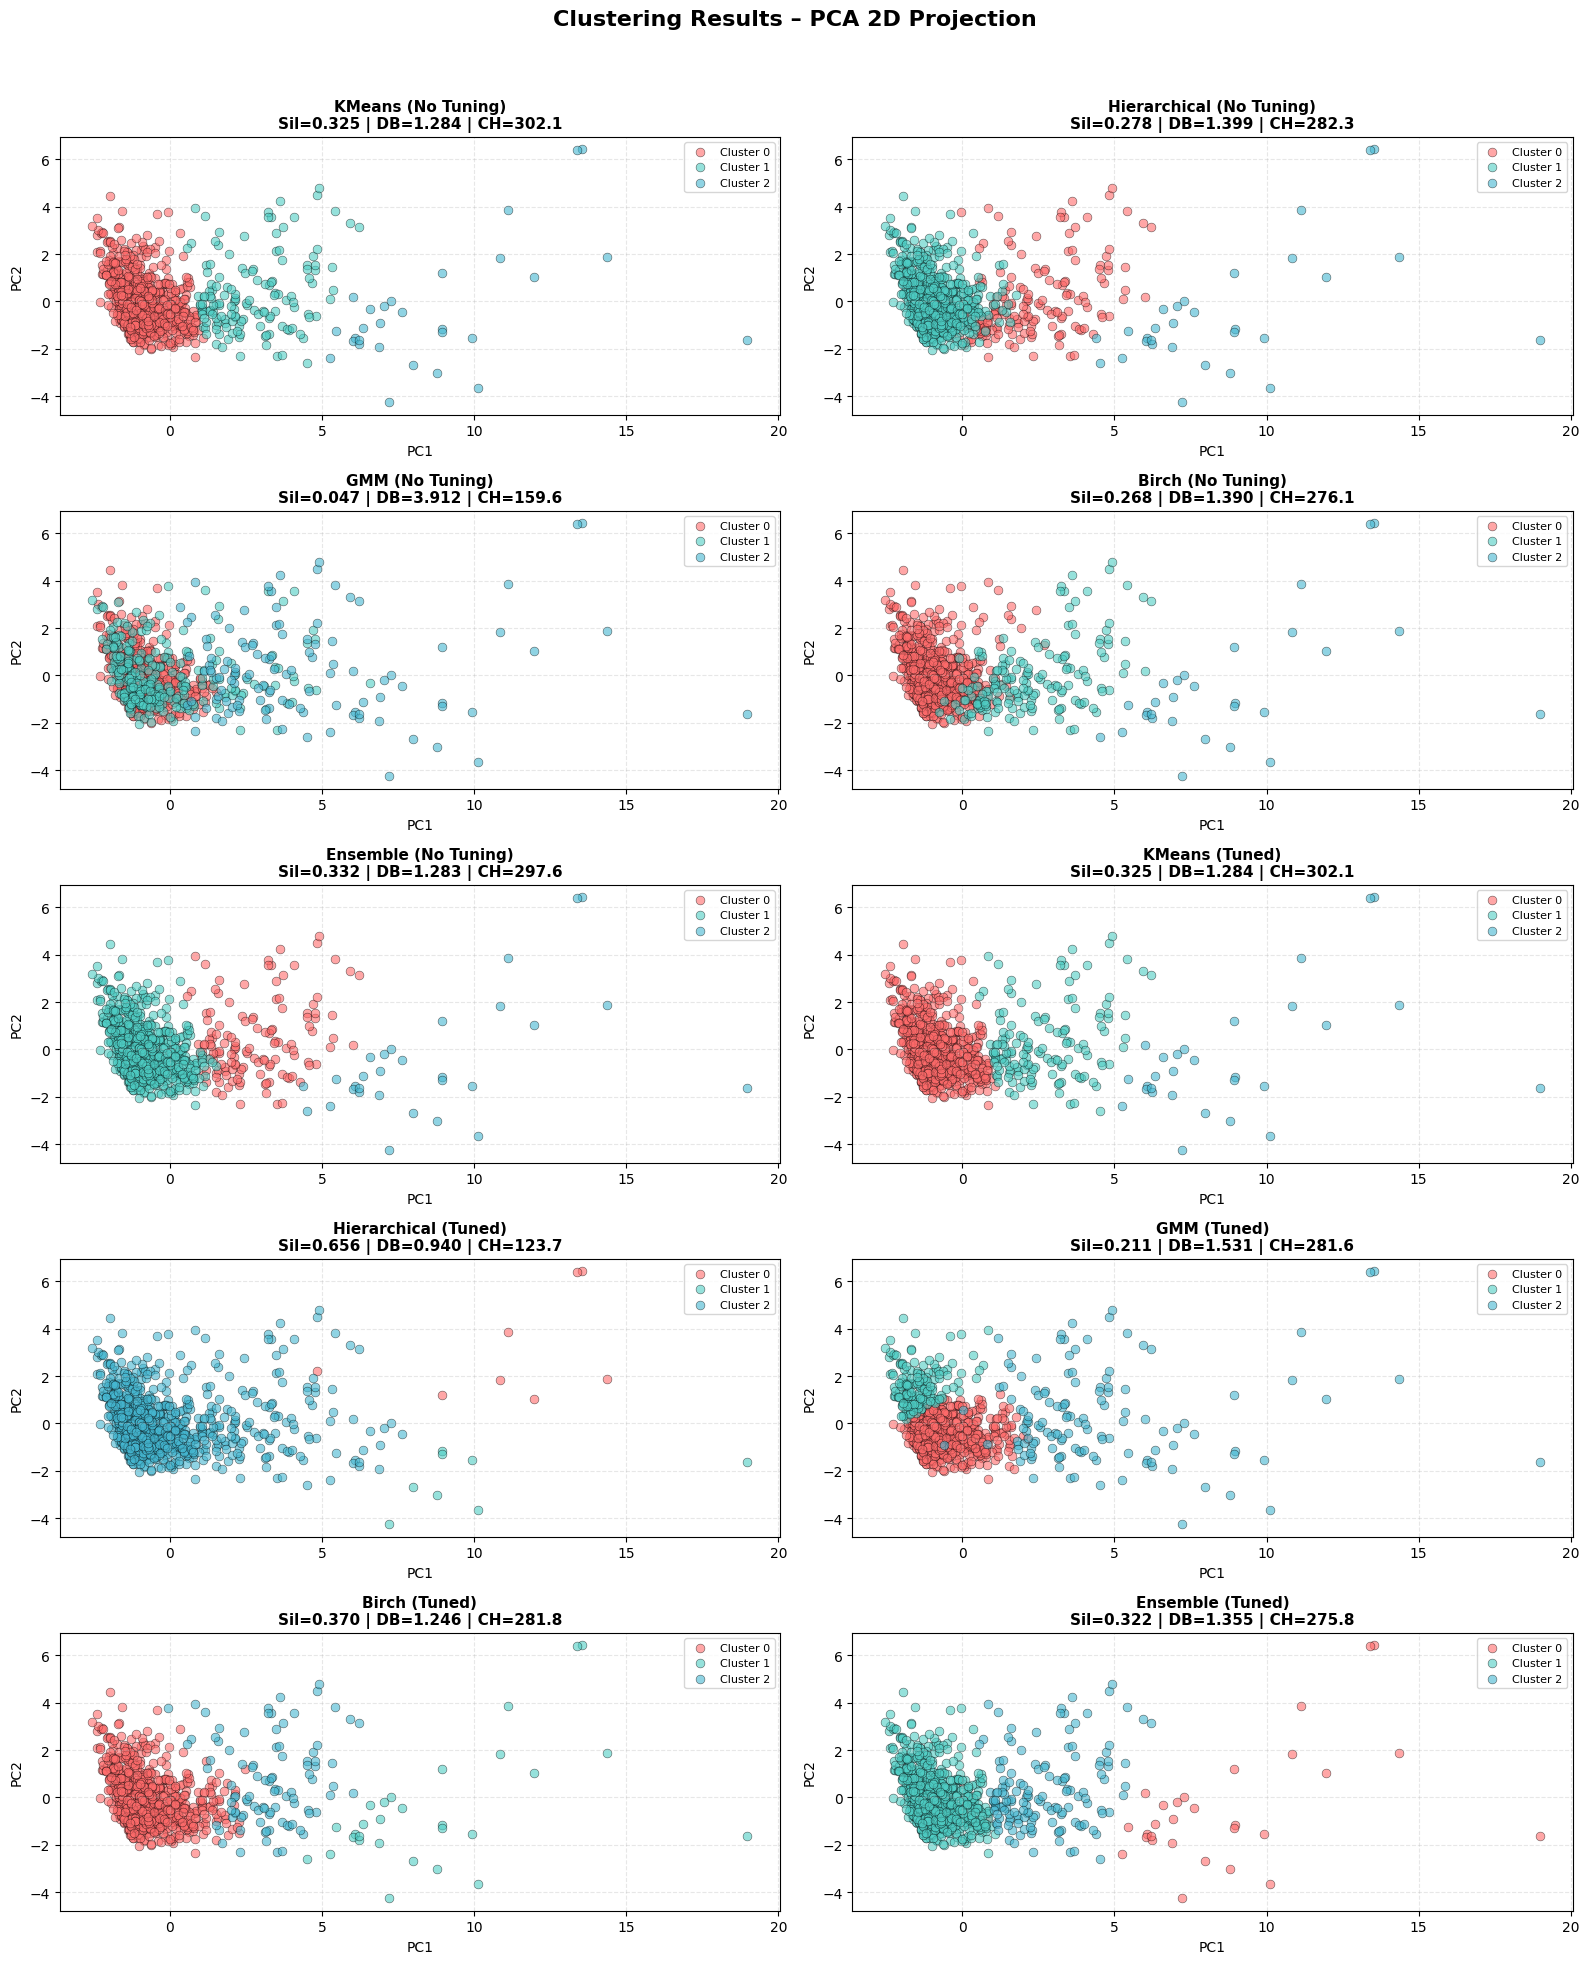


✅ 2D PCA scatter plots generated successfully


In [ ]:
# ========================================
# VISUALIZATION: SCATTER PLOTS (2D PCA)
# SAFE VERSION — NO KeyError
# ========================================

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

print("\n" + "="*70)
print("GENERATING 2D SCATTER PLOTS (SAFE)")
print("="*70)

# ------------------------------------------------------------
# PCA 2D
# ------------------------------------------------------------
pca_2d = PCA(n_components=2, random_state=42)
X_pca_2d = pca_2d.fit_transform(X_scaled)

print(f"\n✓ PCA (2D) applied")
print(f"  Explained variance: {pca_2d.explained_variance_ratio_.sum():.2%}")

# ------------------------------------------------------------
# All possible models (conceptual)
# ------------------------------------------------------------
models_to_plot = [
    ('KMeans_Base', 'KMeans (No Tuning)'),
    ('Hierarchical_Base', 'Hierarchical (No Tuning)'),
    ('GMM_Base', 'GMM (No Tuning)'),
    ('Birch_Base', 'Birch (No Tuning)'),
    ('Ensemble_Base', 'Ensemble (No Tuning)'),
    ('KMeans_Tuned', 'KMeans (Tuned)'),
    ('Hierarchical_Tuned', 'Hierarchical (Tuned)'),
    ('GMM_Tuned', 'GMM (Tuned)'),
    ('Birch_Tuned', 'Birch (Tuned)'),
    ('Ensemble_Tuned', 'Ensemble (Tuned)')
]

# ------------------------------------------------------------
# Only plot models that ACTUALLY exist
# ------------------------------------------------------------
available_models = [(c, t) for c, t in models_to_plot if c in df_model.columns]

if len(available_models) == 0:
    raise ValueError("❌ No clustering results found in df_model. Run Stage 4/5 first.")

print(f"✓ Models available for plotting: {len(available_models)}")

# ------------------------------------------------------------
# Plot layout (dynamic)
# ------------------------------------------------------------
rows = (len(available_models) + 1) // 2
fig, axes = plt.subplots(rows, 2, figsize=(16, rows * 4))
axes = axes.flatten()

fig.suptitle(
    'Clustering Results – PCA 2D Projection',
    fontsize=16,
    fontweight='bold'
)

# Color palette
colors = [
    '#FF6B6B', '#4ECDC4', '#45B7D1',
    '#FFA07A', '#98D8C8', '#F7DC6F'
]

# ------------------------------------------------------------
# Plot each available model
# ------------------------------------------------------------
for idx, (col_name, title) in enumerate(available_models):
    ax = axes[idx]
    labels = df_model[col_name]

    sil = silhouette_score(X_scaled, labels)
    db  = davies_bouldin_score(X_scaled, labels)
    ch  = calinski_harabasz_score(X_scaled, labels)

    for cluster in sorted(labels.unique()):
        mask = labels == cluster
        ax.scatter(
            X_pca_2d[mask, 0],
            X_pca_2d[mask, 1],
            c=colors[cluster % len(colors)],
            label=f'Cluster {cluster}',
            alpha=0.6,
            s=40,
            edgecolors='black',
            linewidth=0.4
        )

    ax.set_title(
        f'{title}\nSil={sil:.3f} | DB={db:.3f} | CH={ch:.1f}',
        fontsize=11,
        fontweight='bold'
    )
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.legend(fontsize=8)
    ax.grid(alpha=0.3, linestyle='--')

# ------------------------------------------------------------
# Hide empty subplots
# ------------------------------------------------------------
for j in range(idx + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

print("\n✅ 2D PCA scatter plots generated successfully")



GENERATING 3D SCATTER PLOTS (SAFE)

✓ PCA (3D) applied
  Explained variance: 70.28%
✓ Models available for plotting: 10


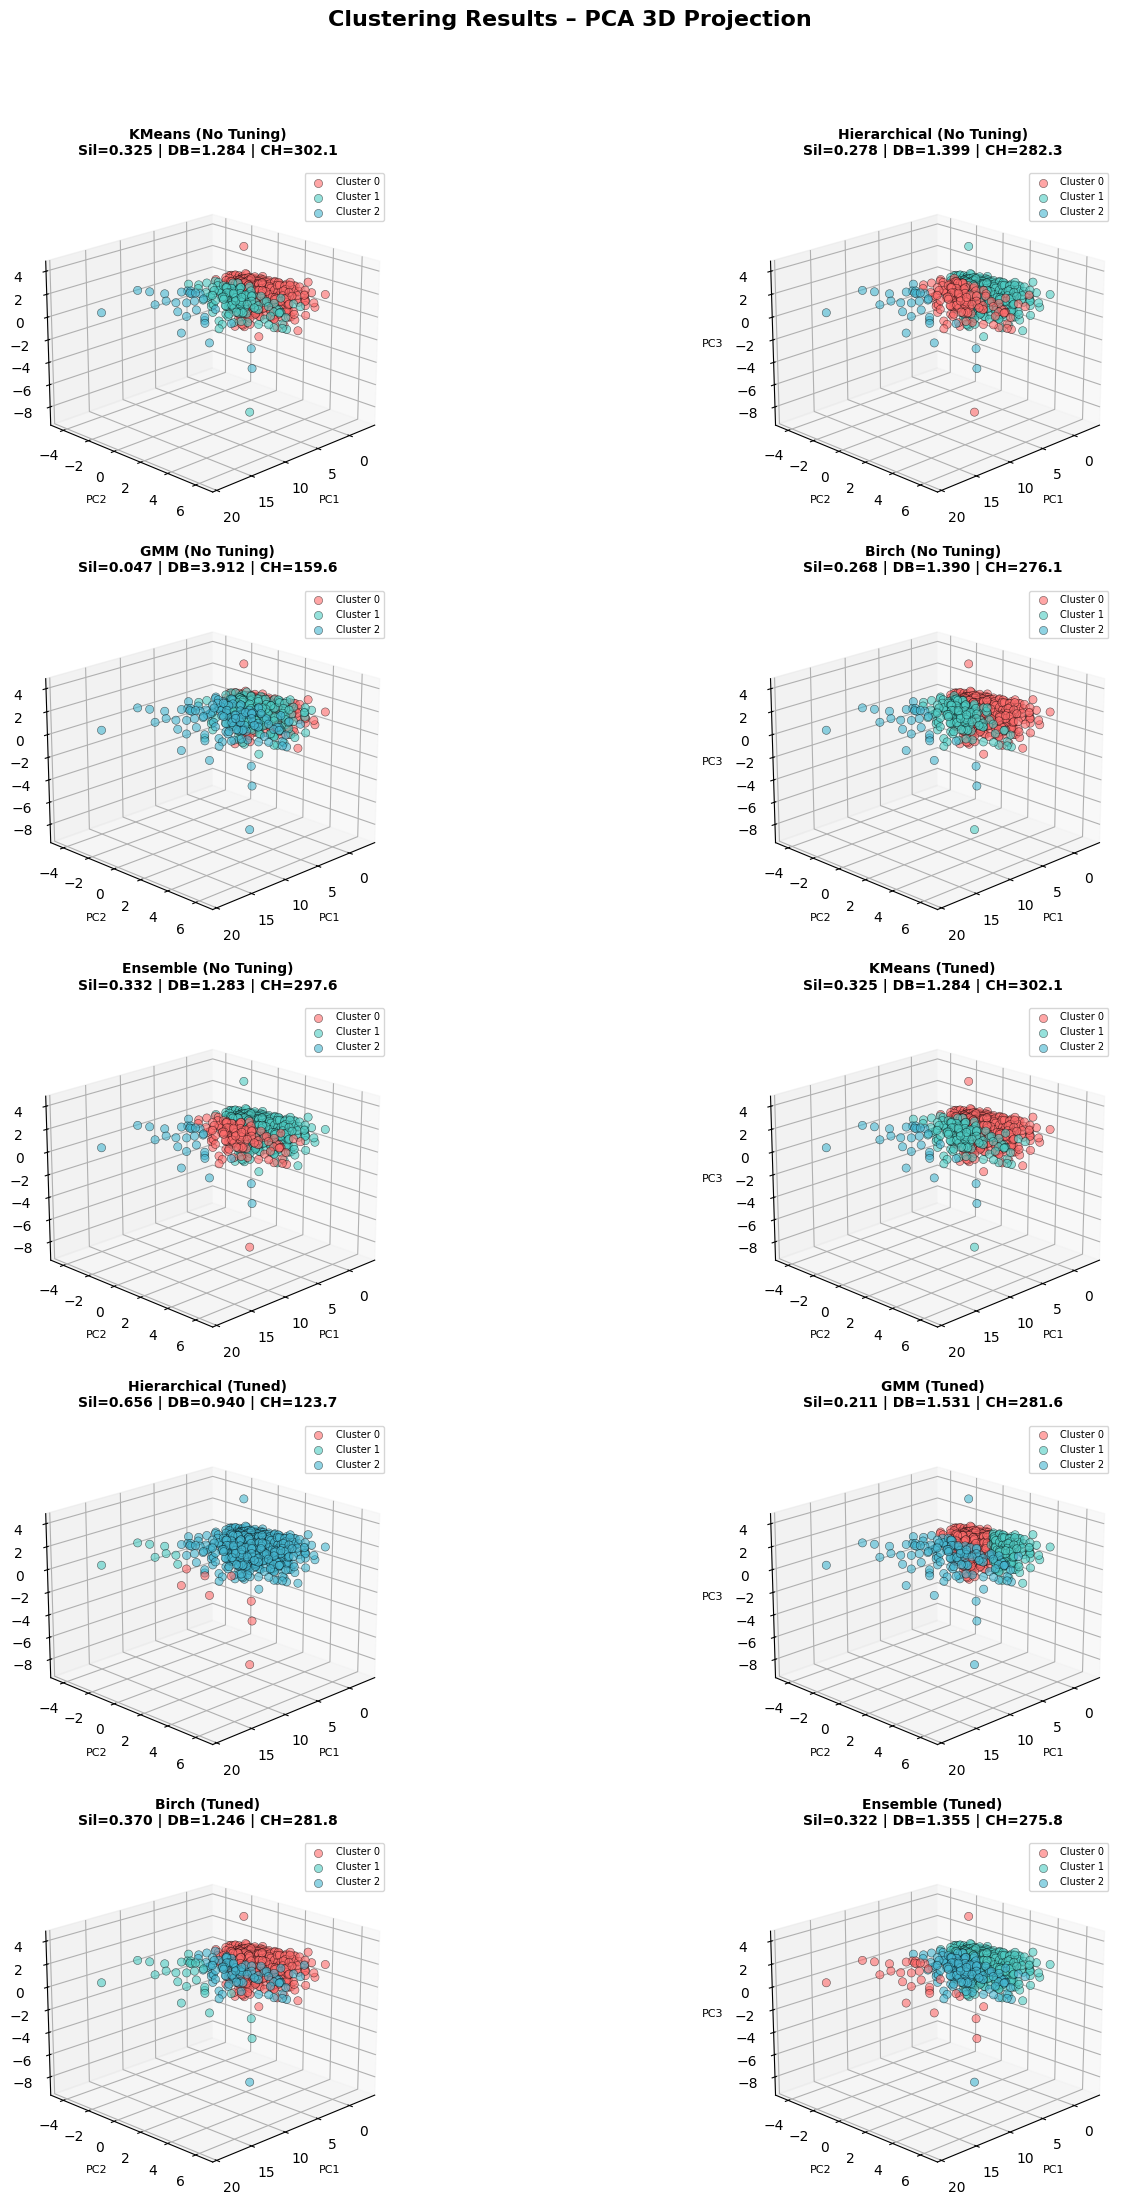


✅ 3D PCA scatter plots generated successfully


In [ ]:
# ========================================
# VISUALIZATION: 3D SCATTER PLOTS (PCA)
# SAFE VERSION — NO KeyError
# ========================================

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

print("\n" + "="*70)
print("GENERATING 3D SCATTER PLOTS (SAFE)")
print("="*70)

# ------------------------------------------------------------
# PCA 3D
# ------------------------------------------------------------
pca_3d = PCA(n_components=3, random_state=42)
X_pca_3d = pca_3d.fit_transform(X_scaled)

print(f"\n✓ PCA (3D) applied")
print(f"  Explained variance: {pca_3d.explained_variance_ratio_.sum():.2%}")

# ------------------------------------------------------------
# All conceptual models
# ------------------------------------------------------------
models_to_plot = [
    ('KMeans_Base', 'KMeans (No Tuning)'),
    ('Hierarchical_Base', 'Hierarchical (No Tuning)'),
    ('GMM_Base', 'GMM (No Tuning)'),
    ('Birch_Base', 'Birch (No Tuning)'),
    ('Ensemble_Base', 'Ensemble (No Tuning)'),
    ('KMeans_Tuned', 'KMeans (Tuned)'),
    ('Hierarchical_Tuned', 'Hierarchical (Tuned)'),
    ('GMM_Tuned', 'GMM (Tuned)'),
    ('Birch_Tuned', 'Birch (Tuned)'),
    ('Ensemble_Tuned', 'Ensemble (Tuned)')
]

# ------------------------------------------------------------
# Filter only existing models
# ------------------------------------------------------------
available_models = [(c, t) for c, t in models_to_plot if c in df_model.columns]

if len(available_models) == 0:
    raise ValueError("❌ No clustering results found in df_model. Run Stage 4/5 first.")

print(f"✓ Models available for plotting: {len(available_models)}")

# ------------------------------------------------------------
# Plot layout (dynamic grid)
# ------------------------------------------------------------
rows = (len(available_models) + 1) // 2
fig = plt.figure(figsize=(18, rows * 4.5))
fig.suptitle(
    'Clustering Results – PCA 3D Projection',
    fontsize=16,
    fontweight='bold',
    y=0.98
)

# Color palette
colors = [
    '#FF6B6B', '#4ECDC4', '#45B7D1',
    '#FFA07A', '#98D8C8', '#F7DC6F'
]

# ------------------------------------------------------------
# Plot each available model
# ------------------------------------------------------------
for idx, (col_name, title) in enumerate(available_models):
    ax = fig.add_subplot(rows, 2, idx + 1, projection='3d')
    labels = df_model[col_name]

    sil = silhouette_score(X_scaled, labels)
    db  = davies_bouldin_score(X_scaled, labels)
    ch  = calinski_harabasz_score(X_scaled, labels)

    for cluster in sorted(labels.unique()):
        mask = labels == cluster
        ax.scatter(
            X_pca_3d[mask, 0],
            X_pca_3d[mask, 1],
            X_pca_3d[mask, 2],
            c=colors[cluster % len(colors)],
            label=f'Cluster {cluster}',
            alpha=0.6,
            s=35,
            edgecolors='black',
            linewidth=0.4
        )

    ax.set_title(
        f'{title}\nSil={sil:.3f} | DB={db:.3f} | CH={ch:.1f}',
        fontsize=10,
        fontweight='bold',
        pad=10
    )
    ax.set_xlabel('PC1', fontsize=8)
    ax.set_ylabel('PC2', fontsize=8)
    ax.set_zlabel('PC3', fontsize=8)
    ax.legend(fontsize=7)
    ax.grid(alpha=0.3)

    # Viewing angle
    ax.view_init(elev=20, azim=45)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

print("\n✅ 3D PCA scatter plots generated successfully")



3D VISUALIZATION - BEST CLUSTERING MODEL

Best Model: GMM (Tuned)
   • Silhouette Score: 0.2113
   • Davies-Bouldin: 1.5305
   • Calinski-Harabasz: 281.63
   • Final Score: 0.7391


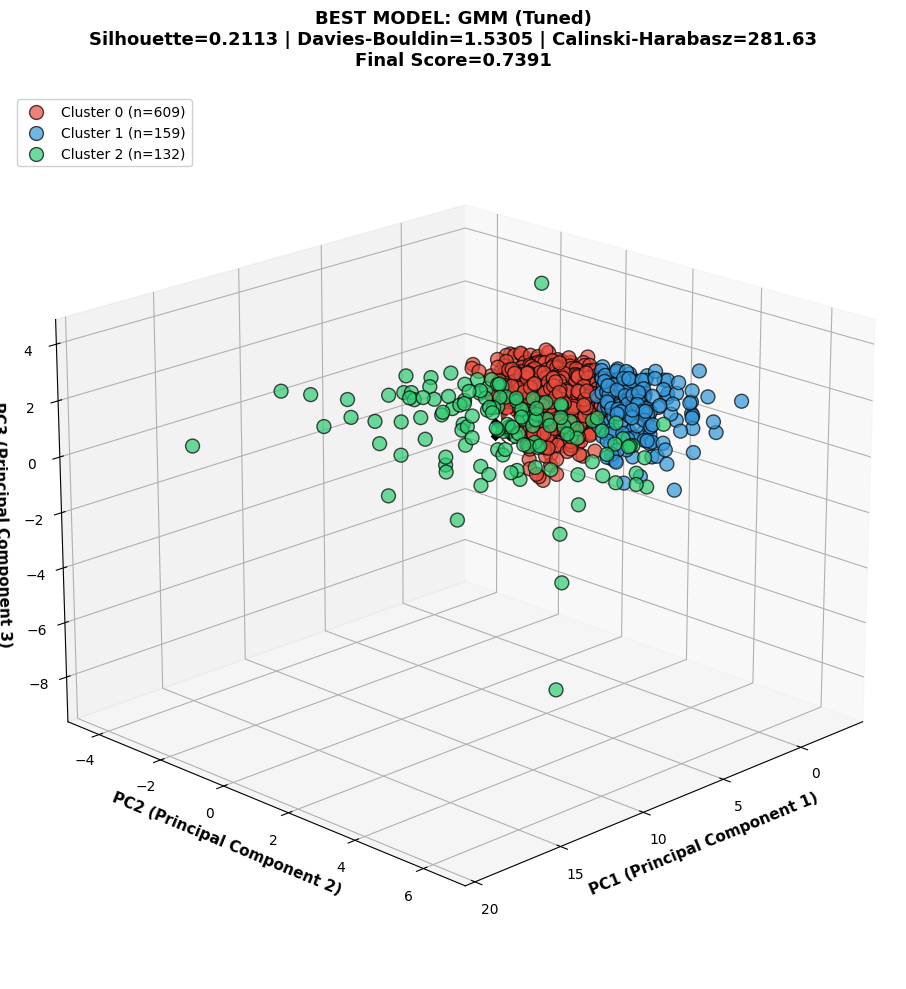


✅ 3D visualization of GMM (Tuned) complete!
   Displaying 3 clusters in 3D space


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# ============================================================
# 3D VISUALIZATION OF BEST MODEL
# ============================================================

print("\n" + "="*70)
print("3D VISUALIZATION - BEST CLUSTERING MODEL")
print("="*70)

# Get best model name and cluster labels
best_model_name = final_best['Model']
best_model_col = (
    best_model_name
    .replace(" (", "_")
    .replace(")", "")
)

# Safety check
if best_model_col not in df_model.columns:
    raise ValueError(
        f"Cluster labels for '{best_model_col}' not found.\n"
        f"Available columns:\n{list(df_model.columns)}"
    )

labels_best = df_model[best_model_col]

# Calculate metrics
sil = silhouette_score(X_scaled, labels_best)
db  = davies_bouldin_score(X_scaled, labels_best)
ch  = calinski_harabasz_score(X_scaled, labels_best)

print(f"\nBest Model: {best_model_name}")
print(f"   • Silhouette Score: {sil:.4f}")
print(f"   • Davies-Bouldin: {db:.4f}")
print(f"   • Calinski-Harabasz: {ch:.2f}")
print(f"   • Final Score: {final_best['Final_Score']:.4f}")

# Define colors for clusters
colors = ['#e74c3c', '#3498db', '#2ecc71', '#f39c12', '#9b59b6', '#1abc9c']

# Create 3D plot
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot each cluster
for cluster in sorted(labels_best.unique()):
    mask = labels_best == cluster
    cluster_size = mask.sum()

    ax.scatter(
        X_pca_3d[mask, 0],
        X_pca_3d[mask, 1],
        X_pca_3d[mask, 2],
        c=colors[cluster % len(colors)],
        label=f'Cluster {cluster} (n={cluster_size})',
        alpha=0.7,
        s=100,
        edgecolors='black',
        linewidth=1
    )

    # Plot cluster center
    center = X_pca_3d[mask].mean(axis=0)
    ax.scatter(
        center[0], center[1], center[2],
        c='black', marker='X', s=400,
        edgecolors='white', linewidth=2, zorder=10
    )

# Title with metrics
ax.set_title(
    f'BEST MODEL: {best_model_name}\n'
    f'Silhouette={sil:.4f} | Davies-Bouldin={db:.4f} | Calinski-Harabasz={ch:.2f}\n'
    f'Final Score={final_best["Final_Score"]:.4f}',
    fontsize=13, fontweight='bold', pad=20
)

# Labels
ax.set_xlabel('PC1 (Principal Component 1)', fontweight='bold', fontsize=11)
ax.set_ylabel('PC2 (Principal Component 2)', fontweight='bold', fontsize=11)
ax.set_zlabel('PC3 (Principal Component 3)', fontweight='bold', fontsize=11)

# Legend
ax.legend(loc='upper left', fontsize=10, framealpha=0.9)

# Set viewing angle
ax.view_init(elev=20, azim=45)
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n✅ 3D visualization of {best_model_name} complete!")
print(f"   Displaying {len(labels_best.unique())} clusters in 3D space")

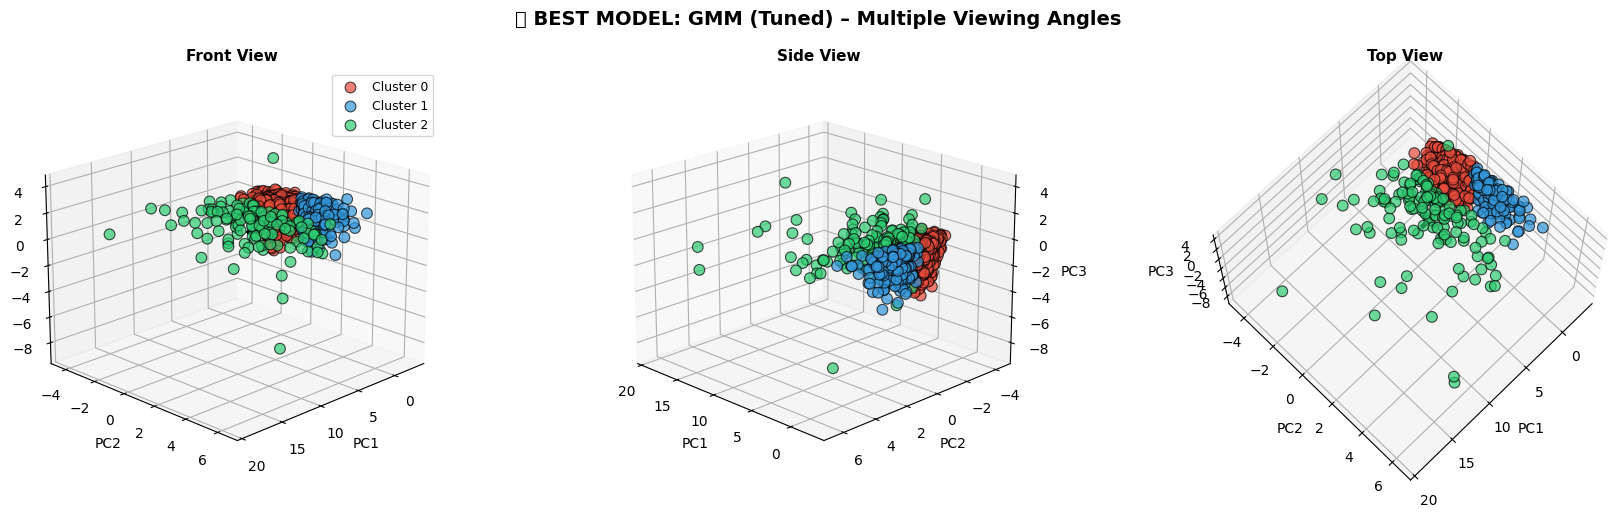

✓ Multiple viewing angles visualization complete!


In [ ]:
# ============================================================
# MULTIPLE VIEWING ANGLES (3D)
# ============================================================

fig, axes = plt.subplots(
    1, 3,
    figsize=(18, 5),
    subplot_kw={'projection': '3d'}
)

fig.suptitle(
    f'🏆 BEST MODEL: {final_best["Model"]} – Multiple Viewing Angles',
    fontsize=14,
    fontweight='bold'
)

# Sudut pandang
angles = [
    (20, 45),    # Front
    (20, 135),   # Side
    (70, 45)     # Top
]

titles = ['Front View', 'Side View', 'Top View']

for idx, (ax, angle, title) in enumerate(zip(axes, angles, titles)):

    # Pastikan label ada (ANTI ERROR)
    labels_best = df_model[best_model_col]

    for cluster in sorted(labels_best.unique()):
        mask = labels_best == cluster

        ax.scatter(
            X_pca_3d[mask, 0],
            X_pca_3d[mask, 1],
            X_pca_3d[mask, 2],
            c=colors[int(cluster) % len(colors)],
            alpha=0.7,
            s=60,
            edgecolors='black',
            linewidth=0.8,
            label=f'Cluster {cluster}' if idx == 0 else None
        )

        # Cluster center
        center = X_pca_3d[mask].mean(axis=0)
        ax.scatter(
            center[0], center[1], center[2],
            c='black', marker='X', s=250,
            edgecolors='white', linewidth=2
        )

    ax.set_title(title, fontsize=11, fontweight='bold')
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    ax.view_init(elev=angle[0], azim=angle[1])
    ax.grid(alpha=0.3)

    if idx == 0:
        ax.legend(fontsize=9)

plt.tight_layout()
plt.show()

print("✓ Multiple viewing angles visualization complete!")


In [ ]:
# ============================================================
# STAGE 7: PREPARE DATA FOR SUPERVISED LEARNING
# ============================================================

from sklearn.model_selection import train_test_split

print("\n" + "="*70)
print("STAGE 7: SUPERVISED LEARNING PREPARATION")
print("="*70)

# ------------------------------------------------------------
# A. DEFINE X (FEATURES) & y (TARGET/CLUSTER LABELS)
# ------------------------------------------------------------

# X_proxy: Use the cleaned & scaled data
X_proxy = X_scaled

# y_proxy: Get cluster labels from best model
best_model_col = (
    final_best['Model']
    .replace(" (", "_")
    .replace(")", "")
)

print(f"\n📌 Using cluster labels from: {best_model_col}")

# Safety check
if best_model_col not in df_model.columns:
    raise ValueError(
        f"❌ Cluster labels for '{best_model_col}' not found.\n"
        f"Available columns:\n{list(df_model.columns)}"
    )

y_proxy = df_model[best_model_col]

print(f"\n✓ X_proxy shape: {X_proxy.shape}")
print(f"✓ y_proxy shape: {y_proxy.shape}")

# Check cluster distribution
print(f"\n📊 Cluster Distribution:")
cluster_counts = y_proxy.value_counts().sort_index()
for cluster, count in cluster_counts.items():
    pct = count / len(y_proxy) * 100
    print(f"   Cluster {cluster}: {count} samples ({pct:.1f}%)")

# Verify lengths match
assert len(X_proxy) == len(y_proxy), "❌ X and y length mismatch!"
print(f"\n✅ Data ready for supervised learning")
print(f"   • Features: {X_proxy.shape[1]} dimensions")
print(f"   • Samples: {len(X_proxy)}")
print(f"   • Clusters: {len(y_proxy.unique())}")

# ========================================
# STEP 2: TRAIN-TEST SPLIT
# ========================================

print("\n" + "="*70)
print("STEP 2: TRAIN-TEST SPLIT")
print("="*70)

# Check if we have enough samples per cluster for stratification
min_cluster_size = cluster_counts.min()

print(f"\n   Smallest cluster: {min_cluster_size} samples")

# Determine if we can use stratify
# Rule: Need at least 2 samples per cluster for 80-20 split
can_stratify = min_cluster_size >= 2

if can_stratify:
    print(f"\n✓ Using stratified split (balanced distribution)")
    X_train, X_test, y_train, y_test = train_test_split(
        X_proxy, y_proxy,
        test_size=0.2,
        random_state=42,
        stratify=y_proxy
    )
else:
    print(f"\n⚠️  Cluster sizes too small for stratification")
    print(f"   Using random split instead")
    X_train, X_test, y_train, y_test = train_test_split(
        X_proxy, y_proxy,
        test_size=0.2,
        random_state=42
    )

print(f"\n📦 Dataset Split:")
print(f"   • Train set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X_proxy)*100:.1f}%)")
print(f"   • Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X_proxy)*100:.1f}%)")

print(f"\n🎯 Train Distribution:")
train_dist = y_train.value_counts().sort_index()
for cluster, count in train_dist.items():
    pct = count / len(y_train) * 100
    print(f"   Cluster {cluster}: {count} samples ({pct:.1f}%)")

print(f"\n🎯 Test Distribution:")
test_dist = y_test.value_counts().sort_index()
for cluster, count in test_dist.items():
    pct = count / len(y_test) * 100
    print(f"   Cluster {cluster}: {count} samples ({pct:.1f}%)")

# Verify all clusters present in both sets (if stratified)
if can_stratify:
    train_clusters = set(y_train.unique())
    test_clusters = set(y_test.unique())
    all_clusters = set(y_proxy.unique())

    if train_clusters == test_clusters == all_clusters:
        print(f"\n✅ All {len(all_clusters)} clusters present in both train & test sets")
    else:
        print(f"\n⚠️  Warning: Cluster distribution mismatch")
        if train_clusters != all_clusters:
            missing = all_clusters - train_clusters
            print(f"   Missing in train: {missing}")
        if test_clusters != all_clusters:
            missing = all_clusters - test_clusters
            print(f"   Missing in test: {missing}")
else:
    print(f"\n⚠️  Note: Random split may have uneven cluster distribution")

print("\n" + "="*70)
print("✅ Train-Test Split Complete - Ready for Model Training")
print("="*70)


STAGE 7: SUPERVISED LEARNING PREPARATION

📌 Using cluster labels from: GMM_Tuned

✓ X_proxy shape: (900, 16)
✓ y_proxy shape: (900,)

📊 Cluster Distribution:
   Cluster 0: 609 samples (67.7%)
   Cluster 1: 159 samples (17.7%)
   Cluster 2: 132 samples (14.7%)

✅ Data ready for supervised learning
   • Features: 16 dimensions
   • Samples: 900
   • Clusters: 3

STEP 2: TRAIN-TEST SPLIT

   Smallest cluster: 132 samples

✓ Using stratified split (balanced distribution)

📦 Dataset Split:
   • Train set: 720 samples (80.0%)
   • Test set: 180 samples (20.0%)

🎯 Train Distribution:
   Cluster 0: 487 samples (67.6%)
   Cluster 1: 127 samples (17.6%)
   Cluster 2: 106 samples (14.7%)

🎯 Test Distribution:
   Cluster 0: 122 samples (67.8%)
   Cluster 1: 32 samples (17.8%)
   Cluster 2: 26 samples (14.4%)

✅ All 3 clusters present in both train & test sets

✅ Train-Test Split Complete - Ready for Model Training


In [ ]:
# ========================================
# STEP 2: TRAIN-TEST SPLIT
# ========================================

print("\n[STEP 2] Train-Test Split")
print("-" * 70)

X_train, X_test, y_train, y_test = train_test_split(
    X_proxy, y_proxy,
    test_size=0.2,
    random_state=42,
    stratify=y_proxy
)

print(f"✓ Train set: {X_train.shape[0]} samples")
print(f"✓ Test set: {X_test.shape[0]} samples")
print(f"\n✓ Train distribution:\n{y_train.value_counts().sort_index()}")
print(f"\n✓ Test distribution:\n{y_test.value_counts().sort_index()}")



[STEP 2] Train-Test Split
----------------------------------------------------------------------
✓ Train set: 720 samples
✓ Test set: 180 samples

✓ Train distribution:
GMM_Tuned
0    487
1    127
2    106
Name: count, dtype: int64

✓ Test distribution:
GMM_Tuned
0    122
1     32
2     26
Name: count, dtype: int64



[STEP 3] Training Random Forest Classifier
----------------------------------------------------------------------
✓ Random Forest trained successfully

📊 Model Performance:
   Train Accuracy: 0.9931
   Test Accuracy: 0.9389

📊 5-Fold Cross-Validation:
   Mean CV Accuracy: 0.9567 (+/- 0.0147)

📋 Classification Report (Test Set):
              precision    recall  f1-score   support

   Cluster 0       0.95      0.98      0.96       122
   Cluster 1       0.90      0.84      0.87        32
   Cluster 2       0.92      0.88      0.90        26

    accuracy                           0.94       180
   macro avg       0.92      0.90      0.91       180
weighted avg       0.94      0.94      0.94       180



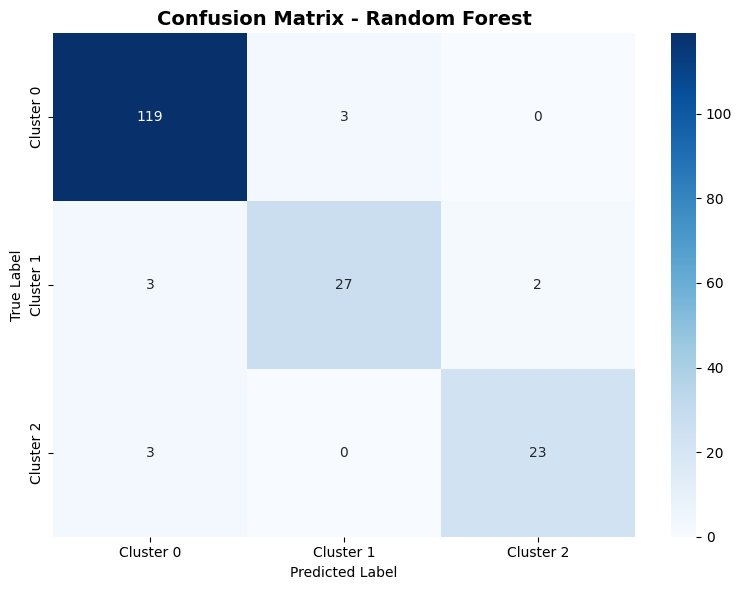


✓ Confusion matrix plotted


In [ ]:
# ========================================
# STEP 3: RANDOM FOREST CLASSIFIER
# ========================================

print("\n[STEP 3] Training Random Forest Classifier")
print("-" * 70)

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

print("✓ Random Forest trained successfully")

# Predictions
y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

# Accuracy
train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

print(f"\n📊 Model Performance:")
print(f"   Train Accuracy: {train_acc:.4f}")
print(f"   Test Accuracy: {test_acc:.4f}")

# Cross-validation
cv_scores = cross_val_score(rf_model, X_proxy, y_proxy, cv=5, scoring='accuracy')
print(f"\n📊 5-Fold Cross-Validation:")
print(f"   Mean CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

# Classification Report
print("\n📋 Classification Report (Test Set):")
print(classification_report(y_test, y_pred_test, target_names=[f'Cluster {i}' for i in sorted(y_proxy.unique())]))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[f'Cluster {i}' for i in sorted(y_proxy.unique())],
            yticklabels=[f'Cluster {i}' for i in sorted(y_proxy.unique())])
plt.title('Confusion Matrix - Random Forest', fontsize=14, fontweight='bold')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

print("\n✓ Confusion matrix plotted")


STEP 4: FEATURE IMPORTANCE ANALYSIS

📊 Total features: 16

🔝 Top 10 Most Important Features:
            Feature  Importance
 TrainingEfficiency    0.260719
  TrainingIntensity    0.209136
PerformanceVelocity    0.202860
 YearsAtCompany_log    0.142674
  TrainingHours_log    0.122993
  MonthlyIncome_log    0.018612
       PotentialGap    0.018201
                Age    0.008968
    CompetencyScore    0.004308
    JobSatisfaction    0.003426

🔻 Bottom 5 Least Important Features:
              Feature  Importance
     Department_Sales    0.001393
Department_Operations    0.001327
        Department_HR    0.001157
 Department_Marketing    0.000809
   Department_Finance    0.000491

💡 Insight:
   • Top 4 features explain 90% of importance
   • 12 features contribute only 10%


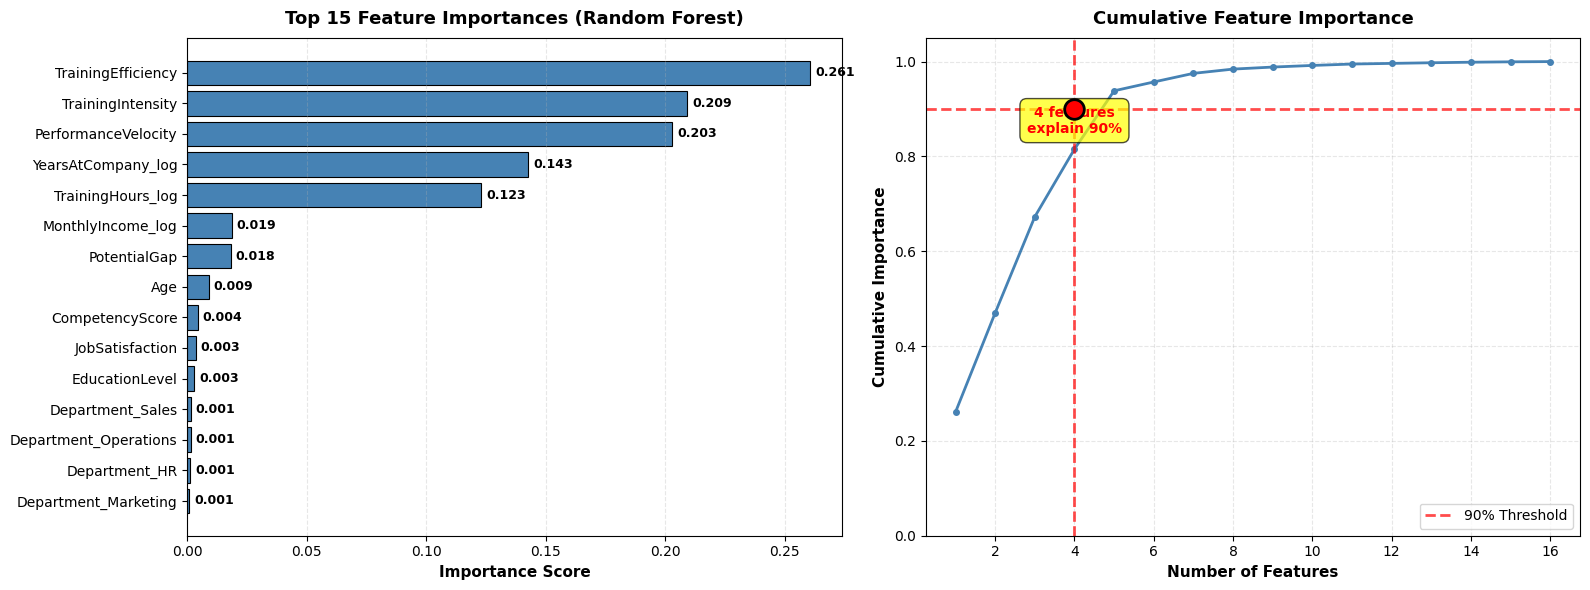


✅ Feature importance analysis complete!
   • Visualizations: Top 15 features + Cumulative importance
   • Consider using top 4 features for model optimization


In [ ]:
# ========================================
# STEP 4: FEATURE IMPORTANCE (BASELINE)
# ========================================

print("\n" + "="*70)
print("STEP 4: FEATURE IMPORTANCE ANALYSIS")
print("="*70)

# Get feature names from X_combined (before scaling)
if hasattr(X_combined, 'columns'):
    feature_names = X_combined.columns.tolist()
else:
    # Fallback if X_combined doesn't have column names
    feature_names = [f'Feature_{i}' for i in range(X_train.shape[1])]

print(f"\n📊 Total features: {len(feature_names)}")

# Feature importance from Random Forest
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False).reset_index(drop=True)

print("\n🔝 Top 10 Most Important Features:")
print(feature_importance.head(10).to_string(index=False))

print("\n🔻 Bottom 5 Least Important Features:")
print(feature_importance.tail(5).to_string(index=False))

# Calculate cumulative importance
feature_importance['Cumulative_Importance'] = feature_importance['Importance'].cumsum()
features_90pct = (feature_importance['Cumulative_Importance'] <= 0.90).sum()

print(f"\n💡 Insight:")
print(f"   • Top {features_90pct} features explain 90% of importance")
print(f"   • {len(feature_names) - features_90pct} features contribute only 10%")

# ========================================
# VISUALIZATION: Feature Importance
# ========================================

import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# === Plot 1: Top 15 Features (Horizontal Bar) ===
top_features = feature_importance.head(15)

axes[0].barh(range(len(top_features)), top_features['Importance'],
             color='steelblue', edgecolor='black', linewidth=0.8)
axes[0].set_yticks(range(len(top_features)))
axes[0].set_yticklabels(top_features['Feature'], fontsize=10)
axes[0].set_xlabel('Importance Score', fontweight='bold', fontsize=11)
axes[0].set_title('Top 15 Feature Importances (Random Forest)',
                  fontsize=13, fontweight='bold', pad=10)
axes[0].invert_yaxis()
axes[0].grid(axis='x', alpha=0.3, linestyle='--')

# Add value labels
for i, (idx, row) in enumerate(top_features.iterrows()):
    axes[0].text(row['Importance'] + 0.002, i, f"{row['Importance']:.3f}",
                va='center', fontsize=9, fontweight='bold')

# === Plot 2: Cumulative Importance ===
axes[1].plot(range(1, len(feature_importance)+1),
             feature_importance['Cumulative_Importance'],
             marker='o', linewidth=2, markersize=4, color='steelblue')
axes[1].axhline(y=0.90, color='red', linestyle='--', linewidth=2,
                label='90% Threshold', alpha=0.7)
axes[1].axvline(x=features_90pct, color='red', linestyle='--', linewidth=2, alpha=0.7)

# Annotate 90% point
axes[1].scatter(features_90pct, 0.90, color='red', s=200, zorder=5,
                edgecolors='black', linewidths=2)
axes[1].text(features_90pct, 0.85, f'{features_90pct} features\nexplain 90%',
             ha='center', fontsize=10, fontweight='bold', color='red',
             bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7))

axes[1].set_xlabel('Number of Features', fontweight='bold', fontsize=11)
axes[1].set_ylabel('Cumulative Importance', fontweight='bold', fontsize=11)
axes[1].set_title('Cumulative Feature Importance', fontsize=13, fontweight='bold', pad=10)
axes[1].grid(alpha=0.3, linestyle='--')
axes[1].legend(fontsize=10)
axes[1].set_ylim(0, 1.05)

plt.tight_layout()
plt.show()

print("\n✅ Feature importance analysis complete!")
print(f"   • Visualizations: Top 15 features + Cumulative importance")
print(f"   • Consider using top {features_90pct} features for model optimization")


STEP 5: SHAP ANALYSIS - GLOBAL INTERPRETATION

⏳ Creating SHAP TreeExplainer...
⏳ Calculating SHAP values for 180 samples...
✓ SHAP values calculated successfully!
   • Shape: (180, 16, 3)

📊 Generating SHAP Summary Plot (Beeswarm - Global)...


<Figure size 1200x800 with 0 Axes>

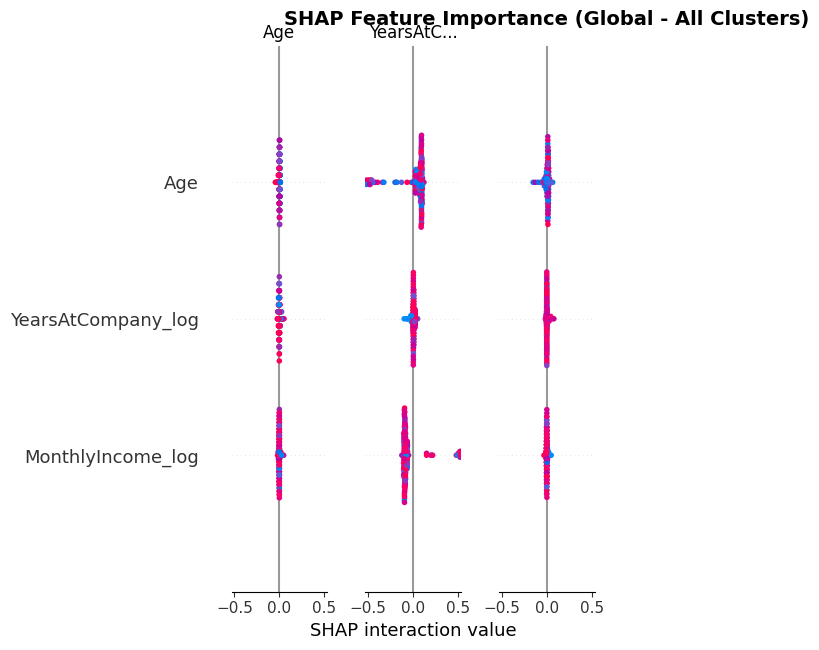

✓ SHAP beeswarm plot generated

📊 Generating SHAP Bar Plot (Mean Absolute Impact)...


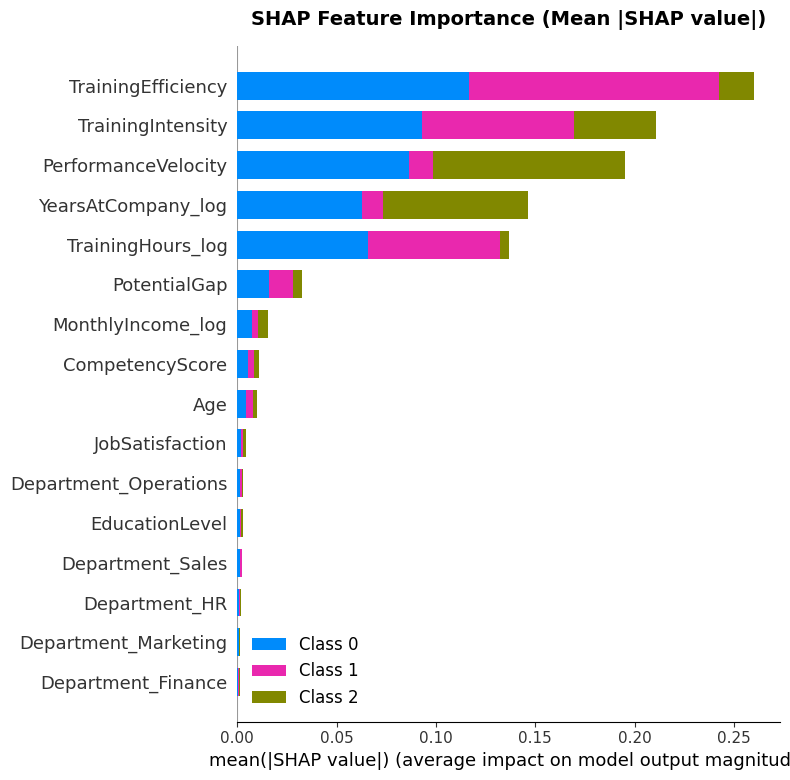

✓ SHAP bar plot generated


In [ ]:
# ========================================
# STEP 5: SHAP ANALYSIS (GLOBAL)
# ========================================

import shap

print("\n" + "="*70)
print("STEP 5: SHAP ANALYSIS - GLOBAL INTERPRETATION")
print("="*70)

# Create SHAP explainer
print("\n⏳ Creating SHAP TreeExplainer...")
explainer = shap.TreeExplainer(rf_model)

# Sample test data for speed
shap_sample_size = min(500, len(X_test))

# Handle both DataFrame and numpy array
if isinstance(X_test, pd.DataFrame):
    X_test_sample = X_test.sample(n=shap_sample_size, random_state=42).reset_index(drop=True)
else:
    # If X_test is numpy array, convert to DataFrame for sampling
    np.random.seed(42)
    sample_indices = np.random.choice(len(X_test), size=shap_sample_size, replace=False)
    X_test_sample = pd.DataFrame(X_test[sample_indices], columns=feature_names)

print(f"⏳ Calculating SHAP values for {shap_sample_size} samples...")
# Calculate SHAP values
shap_values = explainer.shap_values(X_test_sample)

print(f"✓ SHAP values calculated successfully!")
print(f"   • Shape: {np.array(shap_values).shape if isinstance(shap_values, list) else shap_values.shape}")

# SHAP Summary Plot (Global) - Beeswarm
print("\n📊 Generating SHAP Summary Plot (Beeswarm - Global)...")
plt.figure(figsize=(12, 8))

try:
    shap.summary_plot(
        shap_values,
        X_test_sample,
        feature_names=feature_names,
        show=False
    )
    plt.title('SHAP Feature Importance (Global - All Clusters)',
              fontsize=14, fontweight='bold', pad=15)
    plt.tight_layout()
    plt.show()
    print("✓ SHAP beeswarm plot generated")
except Exception as e:
    print(f"⚠️ Could not generate beeswarm plot: {e}")

# SHAP Bar Plot (Global Feature Importance)
print("\n📊 Generating SHAP Bar Plot (Mean Absolute Impact)...")
plt.figure(figsize=(12, 8))

try:
    shap.summary_plot(
        shap_values,
        X_test_sample,
        feature_names=feature_names,
        plot_type="bar",
        show=False
    )
    plt.title('SHAP Feature Importance (Mean |SHAP value|)',
              fontsize=14, fontweight='bold', pad=15)
    plt.tight_layout()
    plt.show()
    print("✓ SHAP bar plot generated")
except Exception as e:
    print(f"⚠️ Could not generate bar plot: {e}")


STEP 6: SHAP ANALYSIS - PER CLUSTER INTERPRETATION

📊 Generating SHAP plots for 3 clusters...

--- Cluster 0 ---


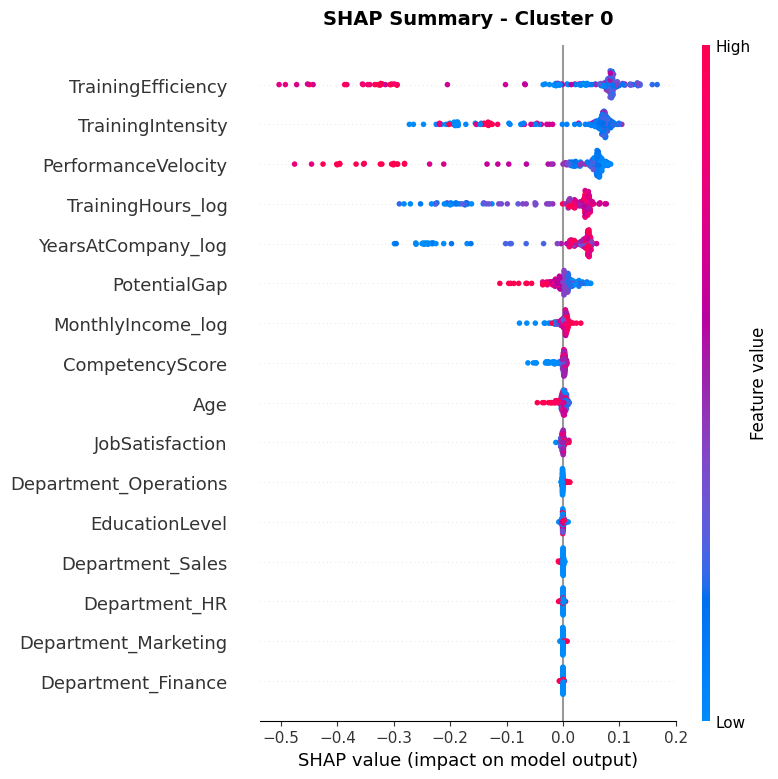

✓ SHAP summary for Cluster 0 generated

--- Cluster 1 ---


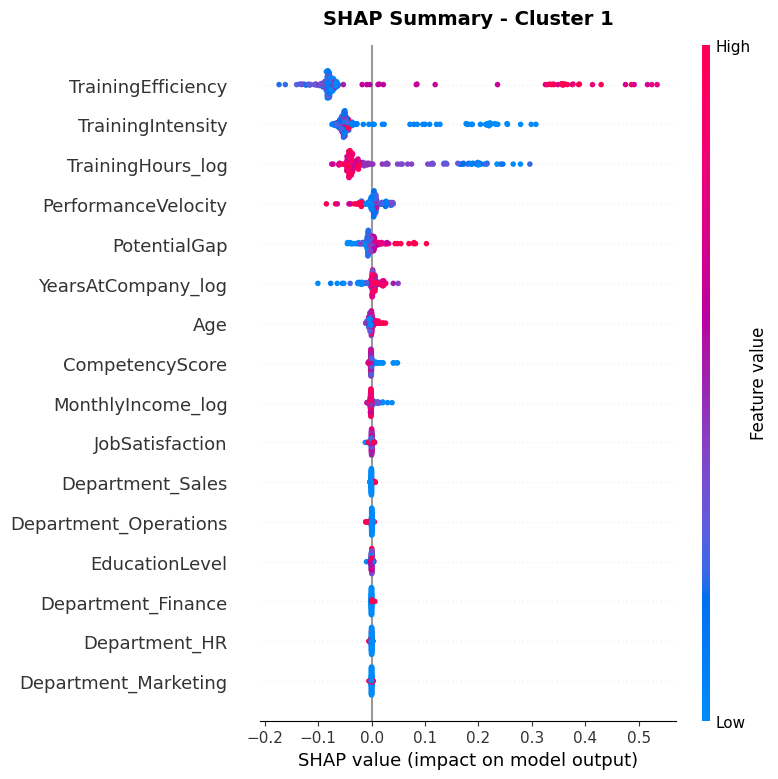

✓ SHAP summary for Cluster 1 generated

--- Cluster 2 ---


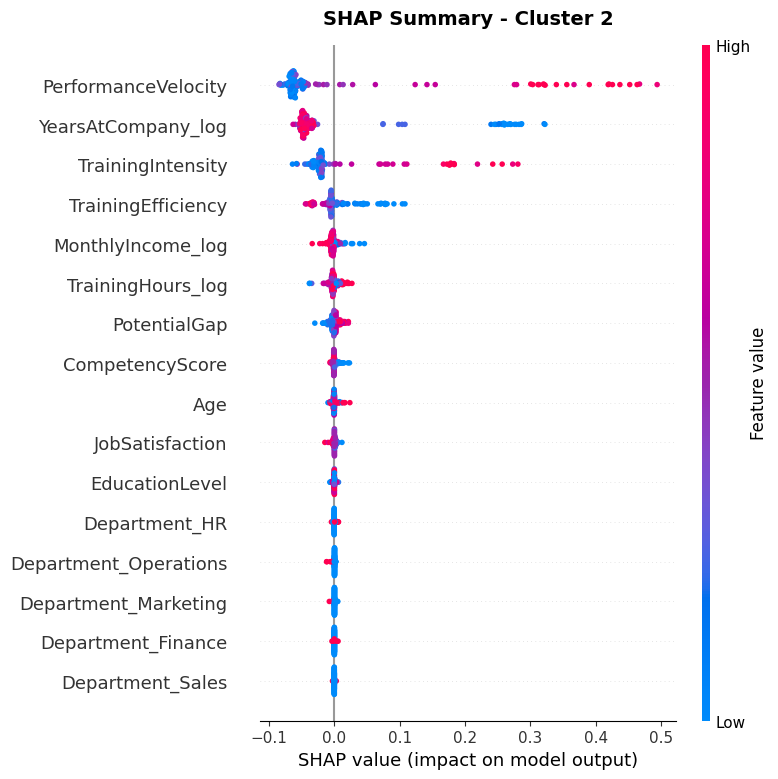

✓ SHAP summary for Cluster 2 generated

✅ All per-cluster SHAP plots generated


In [ ]:
# ========================================
# STEP 6: SHAP ANALYSIS PER CLUSTER
# ========================================

print("\n" + "="*70)
print("STEP 6: SHAP ANALYSIS - PER CLUSTER INTERPRETATION")
print("="*70)

n_clusters = len(np.unique(y_proxy))
print(f"\n📊 Generating SHAP plots for {n_clusters} clusters...\n")

for cluster_idx in range(n_clusters):
    print(f"--- Cluster {cluster_idx} ---")

    # SHAP values for specific cluster
    if isinstance(shap_values, list):
        # Multi-class case: shap_values is a list of arrays
        shap_cluster = shap_values[cluster_idx]
    else:
        # Single output case with multiple classes
        shap_cluster = shap_values[:, :, cluster_idx] if shap_values.ndim == 3 else shap_values

    try:
        plt.figure(figsize=(12, 8))
        shap.summary_plot(
            shap_cluster,
            X_test_sample,
            feature_names=feature_names,
            show=False
        )
        plt.title(f'SHAP Summary - Cluster {cluster_idx}',
                  fontsize=14, fontweight='bold', pad=15)
        plt.tight_layout()
        plt.show()
        print(f"✓ SHAP summary for Cluster {cluster_idx} generated\n")
    except Exception as e:
        print(f"⚠️ Could not generate SHAP plot for Cluster {cluster_idx}: {e}\n")

print("✅ All per-cluster SHAP plots generated")


STEP 7: LIME ANALYSIS - LOCAL INTERPRETATION

⏳ Creating LIME explainer...
✓ LIME explainer created

📊 Generating LIME explanations for sample instances...

--- LIME Explanation for Cluster 0 ---
    Sample position in test set: 0


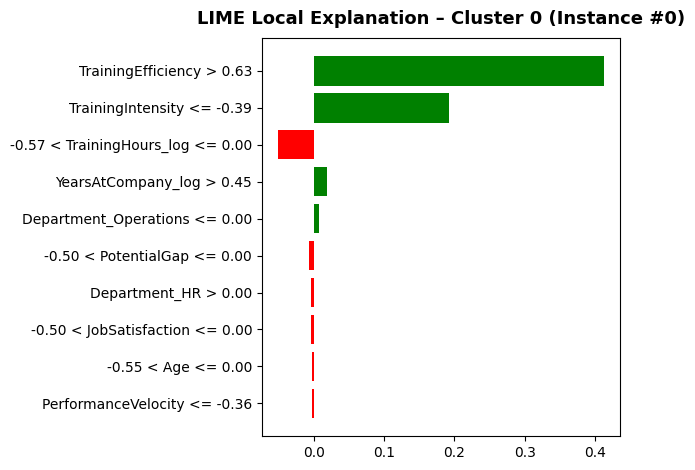


    Top features contributing to prediction:
       1. TrainingEfficiency > 0.63: +0.4125
       2. TrainingIntensity <= -0.39: +0.1919
       3. -0.57 < TrainingHours_log <= 0.00: -0.0506
       4. YearsAtCompany_log > 0.45: +0.0191
       5. Department_Operations <= 0.00: +0.0072

✓ LIME explanation for Cluster 0 generated

--- LIME Explanation for Cluster 1 ---
    Sample position in test set: 3


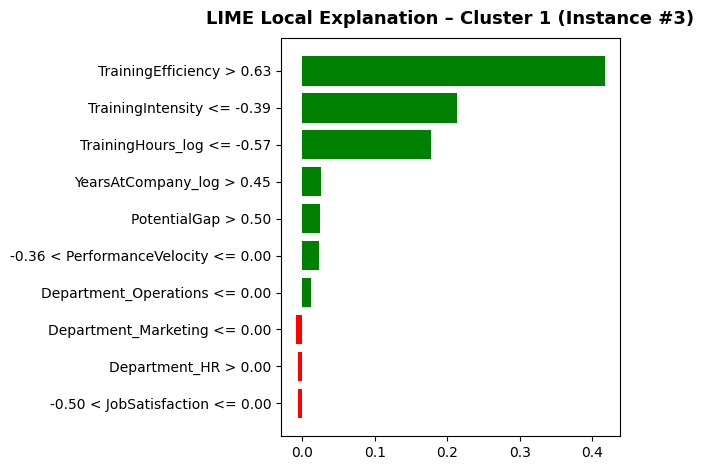


    Top features contributing to prediction:
       1. TrainingEfficiency > 0.63: +0.4171
       2. TrainingIntensity <= -0.39: +0.2134
       3. TrainingHours_log <= -0.57: +0.1779
       4. YearsAtCompany_log > 0.45: +0.0251
       5. PotentialGap > 0.50: +0.0241

✓ LIME explanation for Cluster 1 generated

--- LIME Explanation for Cluster 2 ---
    Sample position in test set: 11


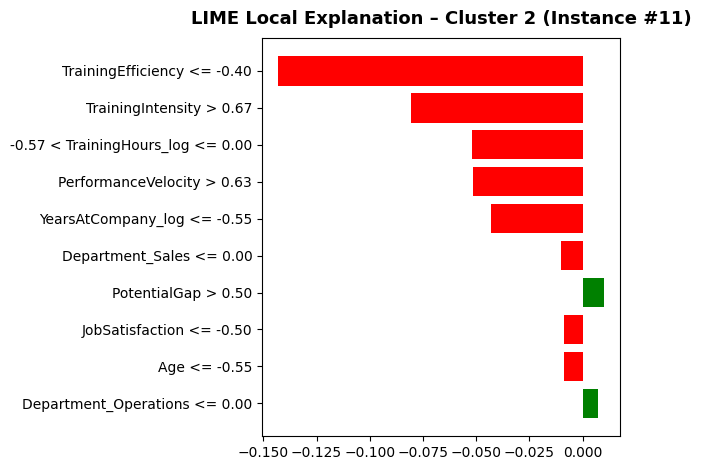


    Top features contributing to prediction:
       1. TrainingEfficiency <= -0.40: -0.1430
       2. TrainingIntensity > 0.67: -0.0804
       3. -0.57 < TrainingHours_log <= 0.00: -0.0518
       4. PerformanceVelocity > 0.63: -0.0514
       5. YearsAtCompany_log <= -0.55: -0.0429

✓ LIME explanation for Cluster 2 generated

✅ All LIME explanations generated successfully


In [ ]:
# ========================================
# STEP 7: LIME ANALYSIS (SINGLE INSTANCE)
# ========================================

from lime import lime_tabular

print("\n" + "="*70)
print("STEP 7: LIME ANALYSIS - LOCAL INTERPRETATION")
print("="*70)

# Convert to DataFrame if needed and reset index
if isinstance(X_test, pd.DataFrame):
    X_test_lime = X_test.reset_index(drop=True)
else:
    X_test_lime = pd.DataFrame(X_test, columns=feature_names).reset_index(drop=True)

y_test_lime = pd.Series(y_test).reset_index(drop=True)

# Create LIME explainer
print("\n⏳ Creating LIME explainer...")
lime_explainer = lime_tabular.LimeTabularExplainer(
    training_data=X_train if isinstance(X_train, np.ndarray) else X_train.values,
    feature_names=feature_names,
    class_names=[f'Cluster {i}' for i in sorted(np.unique(y_test_lime))],
    mode='classification',
    random_state=42
)

print("✓ LIME explainer created")
print("\n📊 Generating LIME explanations for sample instances...\n")

# Generate LIME explanation for one instance per cluster
for cluster_idx in sorted(np.unique(y_test_lime)):

    # Find samples in this cluster (positional, safe)
    cluster_positions = np.where(y_test_lime.values == cluster_idx)[0]

    if len(cluster_positions) == 0:
        print(f"⚠️ No samples in Cluster {cluster_idx} in test set\n")
        continue

    # Select first instance from this cluster
    pos = cluster_positions[0]
    instance = X_test_lime.iloc[pos].values

    print(f"--- LIME Explanation for Cluster {cluster_idx} ---")
    print(f"    Sample position in test set: {pos}")

    try:
        # Generate LIME explanation
        lime_exp = lime_explainer.explain_instance(
            data_row=instance,
            predict_fn=rf_model.predict_proba,
            num_features=10
        )

        # Display as pyplot figure
        fig = lime_exp.as_pyplot_figure()
        plt.title(
            f'LIME Local Explanation – Cluster {cluster_idx} (Instance #{pos})',
            fontsize=13,
            fontweight='bold',
            pad=10
        )
        plt.tight_layout()
        plt.show()

        # Print textual explanation
        print(f"\n    Top features contributing to prediction:")
        exp_list = lime_exp.as_list()
        for i, (feature, weight) in enumerate(exp_list[:5], 1):
            print(f"       {i}. {feature}: {weight:+.4f}")

        print(f"\n✓ LIME explanation for Cluster {cluster_idx} generated\n")

    except Exception as e:
        print(f"⚠️ Could not generate LIME explanation for Cluster {cluster_idx}: {e}\n")

print("✅ All LIME explanations generated successfully")


STEP 8: FINAL MODEL SUMMARY

🎯 Model Configuration:
   • Algorithm: Random Forest Classifier
   • Number of trees: 100
   • Max depth: 10
   • Best Clustering Source: GMM_Tuned
   • Number of Clusters: 3

📊 Model Performance:
   • Test Accuracy: 0.9389 (93.89%)
   • CV Accuracy: 0.9567 (+/- 0.0147)
   • Min CV Score: 0.9333
   • Max CV Score: 0.9778

🔝 Top 5 Most Important Features:
   1. TrainingEfficiency             → 0.2607
   2. TrainingIntensity              → 0.2091
   3. PerformanceVelocity            → 0.2029
   4. YearsAtCompany_log             → 0.1427
   5. TrainingHours_log              → 0.1230

💡 Key Insights:
   • 4 features explain 90% of cluster separation
   • Top feature: TrainingEfficiency (0.2607)
   • Feature importance range: 0.0005 - 0.2607

💾 Model Artifacts:
Save model to disk? (y/n): ya
   ⊗ Model not saved

📊 Generating final summary visualization...


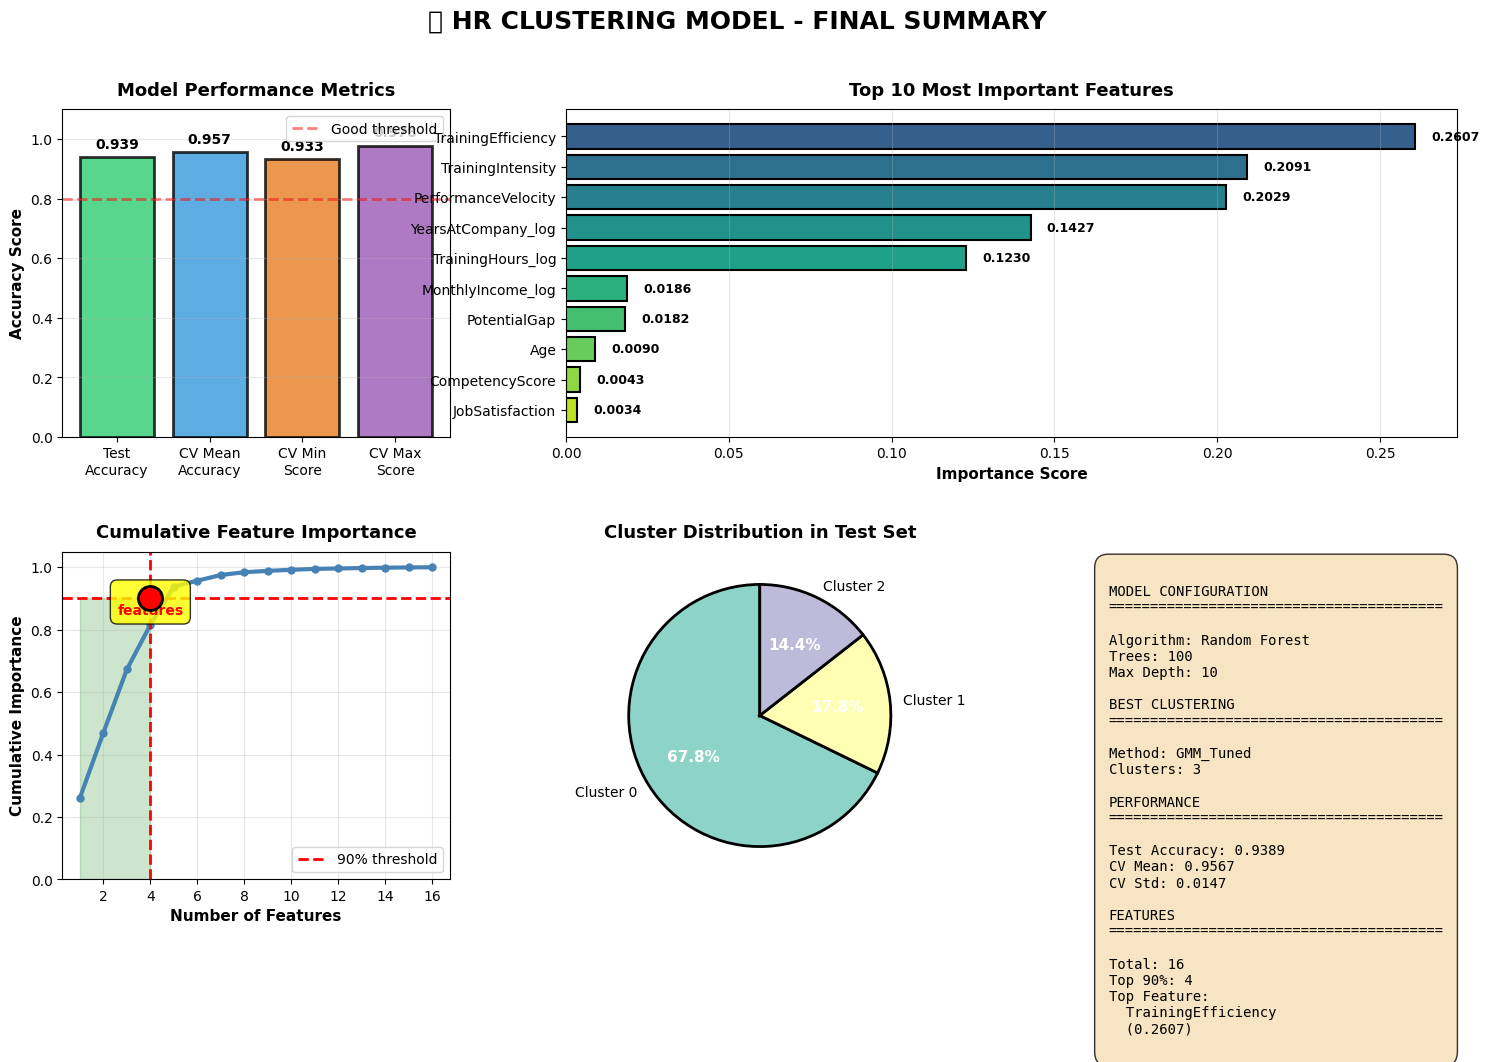

✓ Summary visualization generated

✅ SUPERVISED PROXY CLASSIFICATION COMPLETE

🎉 All analysis steps completed successfully!

📌 Model is ready for:
   • Deployment in production
   • Further hyperparameter tuning
   • Integration with HR systems
   • Real-time employee segmentation
   • Continuous monitoring and retraining

💡 Next Steps:
   1. Review SHAP and LIME explanations for interpretability
   2. Validate predictions with domain experts (HR team)
   3. Monitor model performance over time
   4. Consider ensemble methods or deep learning for improvement
   5. Deploy as API or integrate with HR dashboard



In [ ]:
# ========================================
# STEP 8: FINAL MODEL SUMMARY & SAVE
# ========================================

print("\n" + "="*70)
print("STEP 8: FINAL MODEL SUMMARY")
print("="*70)

print(f"\n🎯 Model Configuration:")
print(f"   • Algorithm: Random Forest Classifier")
print(f"   • Number of trees: {rf_model.n_estimators}")
print(f"   • Max depth: {rf_model.max_depth}")
print(f"   • Best Clustering Source: {best_model_col}")
print(f"   • Number of Clusters: {n_clusters}")

print(f"\n📊 Model Performance:")
print(f"   • Test Accuracy: {test_acc:.4f} ({test_acc*100:.2f}%)")
print(f"   • CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")
print(f"   • Min CV Score: {cv_scores.min():.4f}")
print(f"   • Max CV Score: {cv_scores.max():.4f}")

print(f"\n🔝 Top 5 Most Important Features:")
for idx, row in feature_importance.head(5).iterrows():
    print(f"   {idx+1}. {row['Feature']:<30} → {row['Importance']:.4f}")

print(f"\n💡 Key Insights:")
print(f"   • {features_90pct} features explain 90% of cluster separation")
print(f"   • Top feature: {feature_importance.iloc[0]['Feature']} ({feature_importance.iloc[0]['Importance']:.4f})")
print(f"   • Feature importance range: {feature_importance['Importance'].min():.4f} - {feature_importance['Importance'].max():.4f}")

# Optional: Save model
print(f"\n💾 Model Artifacts:")
save_model = input("Save model to disk? (y/n): ").strip().lower()

if save_model == 'y':
    import joblib
    from datetime import datetime

    # Create timestamp for versioning
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

    # Save model
    model_filename = f'rf_proxy_classifier_{timestamp}.pkl'
    joblib.dump(rf_model, model_filename)
    print(f"   ✓ Model saved to: {model_filename}")

    # Save scaler (if exists)
    if 'scaler' in globals():
        scaler_filename = f'scaler_{timestamp}.pkl'
        joblib.dump(scaler, scaler_filename)
        print(f"   ✓ Scaler saved to: {scaler_filename}")

    # Save feature importance
    feature_imp_filename = f'feature_importance_{timestamp}.csv'
    feature_importance.to_csv(feature_imp_filename, index=False)
    print(f"   ✓ Feature importance saved to: {feature_imp_filename}")

    # Save metadata
    metadata = {
        'timestamp': timestamp,
        'best_clustering': best_model_col,
        'n_clusters': int(n_clusters),
        'test_accuracy': float(test_acc),
        'cv_mean': float(cv_scores.mean()),
        'cv_std': float(cv_scores.std()),
        'n_features': len(feature_names),
        'features': feature_names,
        'top_10_features': feature_importance.head(10)['Feature'].tolist(),
        'top_10_importance': feature_importance.head(10)['Importance'].tolist(),
        'features_for_90pct': int(features_90pct),
        'model_params': {
            'n_estimators': int(rf_model.n_estimators),
            'max_depth': int(rf_model.max_depth) if rf_model.max_depth else None,
            'min_samples_split': int(rf_model.min_samples_split),
            'min_samples_leaf': int(rf_model.min_samples_leaf),
            'random_state': int(rf_model.random_state) if rf_model.random_state else None
        }
    }

    import json
    metadata_filename = f'model_metadata_{timestamp}.json'
    with open(metadata_filename, 'w') as f:
        json.dump(metadata, f, indent=2)
    print(f"   ✓ Metadata saved to: {metadata_filename}")

    # Save a README file
    readme_content = f"""
# HR Clustering Proxy Model - Saved Artifacts

**Generated:** {datetime.now().strftime("%Y-%m-%d %H:%M:%S")}

## Files Included:
1. `{model_filename}` - Trained Random Forest model
2. `{feature_imp_filename}` - Feature importance rankings
3. `{metadata_filename}` - Model metadata and configuration
{"4. `" + scaler_filename + "` - Data scaler" if 'scaler' in globals() else ""}

## Model Summary:
- **Best Clustering Method:** {best_model_col}
- **Number of Clusters:** {n_clusters}
- **Test Accuracy:** {test_acc:.4f} ({test_acc*100:.2f}%)
- **CV Accuracy:** {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})
- **Number of Features:** {len(feature_names)}
- **Top Feature:** {feature_importance.iloc[0]['Feature']} ({feature_importance.iloc[0]['Importance']:.4f})

## How to Load the Model:
```python
import joblib

# Load model
model = joblib.load('{model_filename}')

# Load scaler (if exists)
{"scaler = joblib.load('" + scaler_filename + "')" if 'scaler' in globals() else "# No scaler saved"}

# Make predictions
predictions = model.predict(X_new)
probabilities = model.predict_proba(X_new)
```

## Top 10 Features:
"""
    for idx, row in feature_importance.head(10).iterrows():
        readme_content += f"{idx+1}. {row['Feature']}: {row['Importance']:.4f}\n"

    readme_filename = f'README_{timestamp}.txt'
    with open(readme_filename, 'w') as f:
        f.write(readme_content)
    print(f"   ✓ README saved to: {readme_filename}")

    print(f"\n📦 All artifacts saved with timestamp: {timestamp}")

else:
    print("   ⊗ Model not saved")

# Create summary visualization
print("\n📊 Generating final summary visualization...")

fig = plt.figure(figsize=(18, 10))
gs = fig.add_gridspec(2, 3, hspace=0.35, wspace=0.3)

# === Plot 1: Model Performance Comparison ===
ax1 = fig.add_subplot(gs[0, 0])
metrics = ['Test\nAccuracy', 'CV Mean\nAccuracy', 'CV Min\nScore', 'CV Max\nScore']
values = [test_acc, cv_scores.mean(), cv_scores.min(), cv_scores.max()]
colors = ['#2ecc71', '#3498db', '#e67e22', '#9b59b6']

bars = ax1.bar(metrics, values, color=colors, edgecolor='black', linewidth=2, alpha=0.8)
ax1.set_ylabel('Accuracy Score', fontweight='bold', fontsize=11)
ax1.set_title('Model Performance Metrics', fontsize=13, fontweight='bold', pad=10)
ax1.set_ylim(0, 1.1)
ax1.axhline(y=0.8, color='red', linestyle='--', linewidth=2, alpha=0.5, label='Good threshold')
ax1.grid(axis='y', alpha=0.3)
ax1.legend()

for bar, val in zip(bars, values):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.02,
            f'{val:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=10)

# === Plot 2: Top 10 Feature Importance ===
ax2 = fig.add_subplot(gs[0, 1:])
top_10 = feature_importance.head(10)
colors_gradient = plt.cm.viridis(np.linspace(0.3, 0.9, len(top_10)))

bars2 = ax2.barh(range(len(top_10)), top_10['Importance'],
                 color=colors_gradient, edgecolor='black', linewidth=1.5)
ax2.set_yticks(range(len(top_10)))
ax2.set_yticklabels(top_10['Feature'], fontsize=10)
ax2.set_xlabel('Importance Score', fontweight='bold', fontsize=11)
ax2.set_title('Top 10 Most Important Features', fontsize=13, fontweight='bold', pad=10)
ax2.invert_yaxis()
ax2.grid(axis='x', alpha=0.3)

for i, (idx, row) in enumerate(top_10.iterrows()):
    ax2.text(row['Importance'] + 0.005, i, f"{row['Importance']:.4f}",
            va='center', fontsize=9, fontweight='bold')

# === Plot 3: Cumulative Feature Importance ===
ax3 = fig.add_subplot(gs[1, 0])
ax3.plot(range(1, len(feature_importance)+1),
         feature_importance['Cumulative_Importance'],
         marker='o', linewidth=3, markersize=5, color='steelblue')
ax3.axhline(y=0.90, color='red', linestyle='--', linewidth=2, label='90% threshold')
ax3.axvline(x=features_90pct, color='red', linestyle='--', linewidth=2)
ax3.fill_between(range(1, features_90pct+1), 0, 0.90, alpha=0.2, color='green')

ax3.scatter(features_90pct, 0.90, color='red', s=300, zorder=5,
           edgecolors='black', linewidths=2)
ax3.text(features_90pct, 0.85, f'{features_90pct}\nfeatures',
        ha='center', fontsize=10, fontweight='bold', color='red',
        bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.8))

ax3.set_xlabel('Number of Features', fontweight='bold', fontsize=11)
ax3.set_ylabel('Cumulative Importance', fontweight='bold', fontsize=11)
ax3.set_title('Cumulative Feature Importance', fontsize=13, fontweight='bold', pad=10)
ax3.grid(alpha=0.3)
ax3.legend(fontsize=10)
ax3.set_ylim(0, 1.05)

# === Plot 4: Cluster Distribution in Test Set ===
ax4 = fig.add_subplot(gs[1, 1])
cluster_counts = pd.Series(y_test).value_counts().sort_index()
colors_clusters = plt.cm.Set3(range(len(cluster_counts)))

wedges, texts, autotexts = ax4.pie(cluster_counts.values,
                                     labels=[f'Cluster {i}' for i in cluster_counts.index],
                                     autopct='%1.1f%%',
                                     colors=colors_clusters,
                                     startangle=90,
                                     wedgeprops=dict(edgecolor='black', linewidth=2))

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(11)

ax4.set_title('Cluster Distribution in Test Set', fontsize=13, fontweight='bold', pad=10)

# === Plot 5: Model Info Box ===
ax5 = fig.add_subplot(gs[1, 2])
ax5.axis('off')

info_text = f"""
MODEL CONFIGURATION
{'='*40}

Algorithm: Random Forest
Trees: {rf_model.n_estimators}
Max Depth: {rf_model.max_depth if rf_model.max_depth else 'None'}

BEST CLUSTERING
{'='*40}

Method: {best_model_col}
Clusters: {n_clusters}

PERFORMANCE
{'='*40}

Test Accuracy: {test_acc:.4f}
CV Mean: {cv_scores.mean():.4f}
CV Std: {cv_scores.std():.4f}

FEATURES
{'='*40}

Total: {len(feature_names)}
Top 90%: {features_90pct}
Top Feature:
  {feature_importance.iloc[0]['Feature'][:25]}
  ({feature_importance.iloc[0]['Importance']:.4f})
"""

ax5.text(0.1, 0.95, info_text, transform=ax5.transAxes,
        fontsize=10, verticalalignment='top', fontfamily='monospace',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8, pad=1))

# Main title
fig.suptitle('🎯 HR CLUSTERING MODEL - FINAL SUMMARY',
            fontsize=18, fontweight='bold', y=0.98)

plt.tight_layout()
plt.show()

print("✓ Summary visualization generated")

print("\n" + "="*70)
print("✅ SUPERVISED PROXY CLASSIFICATION COMPLETE")
print("="*70)
print("\n🎉 All analysis steps completed successfully!")
print("\n📌 Model is ready for:")
print("   • Deployment in production")
print("   • Further hyperparameter tuning")
print("   • Integration with HR systems")
print("   • Real-time employee segmentation")
print("   • Continuous monitoring and retraining")

print("\n💡 Next Steps:")
print("   1. Review SHAP and LIME explanations for interpretability")
print("   2. Validate predictions with domain experts (HR team)")
print("   3. Monitor model performance over time")
print("   4. Consider ensemble methods or deep learning for improvement")
print("   5. Deploy as API or integrate with HR dashboard")

print("\n" + "="*70)